In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce202402')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *
from copy import deepcopy
from shapely.geometry import Point,LineString
from pyproj import Proj, Transformer
import pickle
import itertools
from itertools import combinations
import random
from sympy import symbols, Eq, solve
# import datetime
import contextily as ctx

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

# Subway-Amsterdam 

## Generate Baseline network

In [4]:
# Obtain sub-stations in the city
city_sub_stations = sub_stations(osm_path)

In [5]:
# Obtain subway network data
city_sub_network = subway_network(osm_path)

# Prepare the network edges and nodes based on sub-stations and subway network
edges, nodes = prepare_network(city_sub_network, city_sub_stations)

# Expand the edges if required
edges = expand_edges(edges)

# Obtain sub-routes in the city
city_sub_routes = sub_routes(osm_path)

# Sort the sub-routes
city_sub_routes = sorted_routes(city_sub_routes)

# Check the name and assign a column
check_name = check_to_column(city_sub_routes, city_sub_stations)

topology: 100%|████████████████████████████████████████████████████████████████████| 962/962 [00:00<00:00, 4047.79it/s]


In [6]:
# Calculate dataframe length of nodes and edges of metro for adding it to tram dataframes
id_edges_length_sub = len(edges)
id_nodes_length_sub = len(nodes)

In [7]:
# id_nodes_length_sub

In [8]:
# id_edges_length_sub

In [9]:
# create copy dataframe for nodes and edges
city_sub_edges = pd.DataFrame(edges.copy())
city_sub_nodes = pd.DataFrame(nodes.copy())

In [10]:
# delete useless and wrong edges 
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 761)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 771) & (city_sub_edges['to_id'] == 766)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 762) & (city_sub_edges['to_id'] == 771)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 767) & (city_sub_edges['to_id'] == 771)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 773)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 780) & (city_sub_edges['to_id'] == 772)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 774) & (city_sub_edges['to_id'] == 780)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 775) & (city_sub_edges['to_id'] == 780)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 180) & (city_sub_edges['to_id'] == 345)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 491) & (city_sub_edges['to_id'] == 492)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 498) & (city_sub_edges['to_id'] == 499)].index, inplace=True)



city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 634) & (city_sub_edges['to_id'] == 635)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 654) & (city_sub_edges['to_id'] == 655)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 584) & (city_sub_edges['to_id'] == 585)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 569) & (city_sub_edges['to_id'] == 570)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 588) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 577) & (city_sub_edges['to_id'] == 589)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 607) & (city_sub_edges['to_id'] == 577)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 564) & (city_sub_edges['to_id'] == 565)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 586) & (city_sub_edges['to_id'] == 587)].index, inplace=True)

city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 643) & (city_sub_edges['to_id'] == 644)].index, inplace=True)
city_sub_edges.drop(city_sub_edges[(city_sub_edges['from_id'] == 638) & (city_sub_edges['to_id'] == 639)].index, inplace=True)

city_sub_edges = city_sub_edges.reset_index(drop = True)

In [11]:
# revise Zuid metro stations' coordinates, replace 712 with 180 and 345 nodes to avoid wrong shortest-path edges
geometry_value1 = city_sub_nodes.loc[city_sub_nodes['id'] == 180, 'geometry'].values[0]
geometry_value2 = city_sub_nodes.loc[city_sub_nodes['id'] == 345, 'geometry'].values[0]

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geometry'] = geometry_value1
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_x'] = geometry_value1.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737797', 'geo_y'] = geometry_value1.y

city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geometry'] = geometry_value2
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_x'] = geometry_value2.x
city_sub_stations.loc[city_sub_stations['osm_id'] == '4073737796', 'geo_y'] = geometry_value2.y

In [12]:
# city_sub_nodes

In [13]:
# city_sub_stations

In [14]:
# city_sub_edges

In [15]:
# city_sub_routes

In [16]:
# Define replacement dictionary of names of destination stations
replacement_dict = {
     'Amsterdam Centraal': 'Centraal Station',
}
# Replace values in the 'to' column of the metro routes using the replacement dictionary
city_sub_routes['to'] = city_sub_routes['to'].replace(replacement_dict, regex=True).str.strip()

# Reset the index of the metro routes
city_sub_routes = city_sub_routes.reset_index(drop=True)

# Check if the values in the 'to' column of the metro routes match the station names
check_name = check_to_column(city_sub_routes, city_sub_stations)

In [17]:
# # restore DataFrames as pickle files
# city_sub_edges.to_pickle('city_sub_edges_0328.pkl')
# city_sub_stations.to_pickle('city_sub_stations_0328.pkl')
# city_sub_nodes.to_pickle('city_sub_nodes_0328.pkl')
# city_sub_routes.to_pickle('city_sub_routes_0328.pkl')

In [18]:
# Create a dictionary mapping start stations to their corresponding routes
city_sub_start_station_name_dict = start_station_dict(city_sub_routes)

# Create a dictionary mapping subway lines to their corresponding routes
city_sub_line_dict = line_dict(city_sub_routes)

# Create a list of all station names in the city's subway network
city_all_sub_stations_name = all_station_list(city_sub_stations)

# Create a dictionary mapping subway lines to the ordered list of stations on each line
city_sub_order_route_dict = order_stations_inline(city_sub_line_dict, city_all_sub_stations_name, city_sub_routes, city_sub_start_station_name_dict)

In [19]:
# city_sub_order_route_dict

In [20]:
# revise station sequence of 51_1 route
df51_1 = pd.read_excel('C:\\projects\\UTNCE\\data\\Metro 51 Centraal Station = Isolatorweg.xlsx',header=None)
df51_1 = df51_1[0::4].reset_index(drop=True)
df51_1.columns = ['name']
df51_1.name[9] = 'Zuid' 
df51_1.name[13] = 'Lelylaan' 
df51_1.name[16] = 'De Vlugtlaan' 

df = city_sub_order_route_dict['Metro 51: Centraal Station => Isolatorweg']
df_reordered = pd.merge(df51_1,df,on='name')

desired_order = ['id', 'name', 'geometry', 'geo_x', 'geo_y']
df_reordered = df_reordered[desired_order]

key_to_replace = 'Metro 51: Centraal Station => Isolatorweg'
city_sub_order_route_dict[key_to_replace] = df_reordered

# city_sub_order_route_dict

In [21]:
# revise station sequence of 52 routes
df52_metro_1 = city_sub_order_route_dict['Metro 52: Noord => Zuid']
df52_metro_2 = city_sub_order_route_dict['Metro 52: Zuid => Noord']

df52_metro_1_dep = df52_metro_1[df52_metro_1.name == 'De Pijp'].copy()
df52_metro_2_dep = df52_metro_2[df52_metro_2.name == 'De Pijp'].copy()


columns_to_swap = ['geometry', 'geo_x', 'geo_y']
for column in columns_to_swap:
    temp = df52_metro_1_dep[column].copy()
    df52_metro_1_dep.loc[df52_metro_1_dep['name'] == 'De Pijp', column] = df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column].values
    df52_metro_2_dep.loc[df52_metro_2_dep['name'] == 'De Pijp', column] = temp.values

df52_metro_1.loc[df52_metro_1['name'] == 'De Pijp', columns_to_swap] = df52_metro_1_dep[columns_to_swap].values
df52_metro_2.loc[df52_metro_2['name'] == 'De Pijp', columns_to_swap] = df52_metro_2_dep[columns_to_swap].values

# city_sub_order_route_dict

In [22]:
# city_sub_order_route_dict

In [23]:
# Create a dictionary mapping subway lines to the pairs of station IDs on each line
city_sub_order_id_pairs = id_pairs_inline(city_sub_line_dict, city_sub_order_route_dict, city_sub_nodes)

In [24]:
# Create a graph representing the subway network using the extracted undirected edges and nodes
G = create_ground_graph(city_sub_edges, city_sub_nodes)

# Calculate the shortest path id pairs for each subway line

city_sub_all_shortest_paths_id_dict = city_sub_order_id_pairs.copy()


for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths id for the current line using the subway network edges
    city_sub_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_sub_order_id_pairs[line], city_sub_edges)

In [25]:
# city_sub_all_shortest_paths_id_dict

In [26]:
# city_sub_edges

In [27]:
# Obtain the right ordered edges dataframe of metro
city_sub_ordered_edges = edges_revise_direction(city_sub_all_shortest_paths_id_dict,city_sub_edges)

In [28]:
# city_sub_ordered_edges

In [29]:
# Create a graph representing the subway network using the directed edges and nodes
G = nx.DiGraph()

for _, row in city_sub_nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
    
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_sub_ordered_edges[['from_id', 'to_id', 'time', 'weights']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[2]*60}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
# edges_list
G.add_edges_from(edges_list)

In [30]:
# Calculate the shortest path pairs for each subway line
city_sub_shortest_path_pairs_dict = city_sub_order_id_pairs.copy()
duplicate_row_count = city_sub_order_id_pairs.copy()
city_sub_shortest_path_edges_dict = city_sub_order_id_pairs.copy()
city_sub_edges_dict = city_sub_order_id_pairs.copy()

for line in city_sub_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the subway network edges
    city_sub_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_sub_order_id_pairs[line], city_sub_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the subway network edges for the current line
    duplicate_row_count[line], city_sub_shortest_path_edges_dict[line], city_sub_edges_dict[line] = edges_with_count_weight(city_sub_shortest_path_pairs_dict[line], city_sub_ordered_edges)
    
# Plot all subway routes
# plot_routes(city_sub_routes, city_sub_ordered_edges, city_sub_shortest_path_edges_dict)

In [31]:
# city_sub_shortest_path_pairs_dict

## Obtain dataframes of edges,nodes and stations for baseline network of metro

### Add columns to edges--city_sub_extended_edges

In [32]:
city_sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_shortest_path_edges_dict, city_sub_routes)

In [33]:
city_sub_extended_edges = add_columns_to_edges(city_sub_shortest_path_edges_dict,city_sub_ordered_edges)

In [34]:
# column_to_drop = 'count_weight'
# city_sub_extended_edges = city_sub_extended_edges.drop(columns=column_to_drop)

In [35]:
city_sub_extended_edges

osm_id                                           geometry railway  \
0      23157994  LINESTRING (4.9236699 52.3361909, 4.9236979 52...  subway   
1      23158053  LINESTRING (4.9642294 52.2945339, 4.9644259 52...  subway   
2      23158054  LINESTRING (4.9622901 52.2955678, 4.9624673 52...  subway   
3      23189033  LINESTRING (4.8467318 52.3952137, 4.8471439 52...  subway   
4      23189039  LINESTRING (4.8409161 52.3937679, 4.8416087 52...  subway   
..          ...                                                ...     ...   
935  1131538381  LINESTRING (4.9200955 52.3417374, 4.9200444 52...  subway   
936  1131538382  LINESTRING (4.9201445 52.3416568, 4.9200955 52...  subway   
937  1131538383  LINESTRING (4.9200365 52.3417239, 4.9200773 52...  subway   
938  1131538384  LINESTRING (4.9197172 52.3423576, 4.9197589 52...  subway   
939  1131538385  LINESTRING (4.9194179 52.3424458, 4.919254 52....  subway   

    service   id  from_id  to_id    distance      time  weights     to_from  \
0      None    0        1      0  258.660599  0.010346      258      (0, 1)   
1      None    1        2      3  215.433271  0.008617      215      (3, 2)   
2      None    2        4      5  121.794737  0.004872      121      (5, 4)   
3      None    3        7      6   28.046592  0.001122       28      (6, 7)   
4      None    4      492      8  382.935219  0.015317      382    (8, 492)   
..      ...  ...      ...    ...         ...       ...      ...         ...   
935    None  957      803    463   73.656989  0.002946       73  (463, 803)   
936    None  958      462    803    9.568427  0.000383        9  (803, 462)   
937    None  959      246    804    9.568874  0.000383        9  (804, 246)   
938    None  960      804    463   73.789113  0.002952       73  (463, 804)   
939    None  961      256    249   40.444210  0.001618       40  (249, 256)   

        from_to  count_weight                            route_name_list  \
0        (1, 0)           1.0  Metro 51: Isolatorweg => Centraal Station   
1        (2, 3)           1.0              Metro 50: Isolatorweg => Gein   
2        (4, 5)           1.0              Metro 50: Isolatorweg => Gein   
3        (7, 6)           1.0              Metro 50: Isolatorweg => Gein   
4      (492, 8)           1.0              Metro 50: Isolatorweg => Gein   
..          ...           ...                                        ...   
935  (803, 463)           1.0  Metro 53: Gaasperplas => Centraal Station   
936  (462, 803)           1.0  Metro 53: Gaasperplas => Centraal Station   
937  (246, 804)           1.0  Metro 51: Isolatorweg => Centraal Station   
938  (804, 463)           1.0  Metro 51: Isolatorweg => Centraal Station   
939  (256, 249)           1.0  Metro 51: Centraal Station => Isolatorweg   

      route         ref  
0    subway          51  
1    subway      50, 54  
2    subway      50, 54  
3    subway      50, 51  
4    subway      50, 51  
..      ...         ...  
935  subway      53, 54  
936  subway      53, 54  
937  subway          51  
938  subway          51  
939  subway  51, 53, 54  

[940 rows x 16 columns]

### Organize edges dataframe for baseline network--city_sub_new_edges

In [36]:
city_sub_shortest_path_edges_df = pd.concat(city_sub_shortest_path_edges_dict.values()).reset_index(drop=True)
city_sub_shortest_path_edges_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)

In [37]:
# city_sub_shortest_path_edges_df

In [38]:
city_sub_new_edges = pd.merge(city_sub_extended_edges,city_sub_shortest_path_edges_df.geometry,on='geometry',how='inner')

In [39]:
city_sub_new_edges

osm_id                                           geometry railway  \
0      23157994  LINESTRING (4.9236699 52.3361909, 4.9236979 52...  subway   
1      23158053  LINESTRING (4.9642294 52.2945339, 4.9644259 52...  subway   
2      23158054  LINESTRING (4.9622901 52.2955678, 4.9624673 52...  subway   
3      23189033  LINESTRING (4.8467318 52.3952137, 4.8471439 52...  subway   
4      23189039  LINESTRING (4.8409161 52.3937679, 4.8416087 52...  subway   
..          ...                                                ...     ...   
631  1131538381  LINESTRING (4.9200955 52.3417374, 4.9200444 52...  subway   
632  1131538382  LINESTRING (4.9201445 52.3416568, 4.9200955 52...  subway   
633  1131538383  LINESTRING (4.9200365 52.3417239, 4.9200773 52...  subway   
634  1131538384  LINESTRING (4.9197172 52.3423576, 4.9197589 52...  subway   
635  1131538385  LINESTRING (4.9194179 52.3424458, 4.919254 52....  subway   

    service   id  from_id  to_id    distance      time  weights     to_from  \
0      None    0        1      0  258.660599  0.010346      258      (0, 1)   
1      None    1        2      3  215.433271  0.008617      215      (3, 2)   
2      None    2        4      5  121.794737  0.004872      121      (5, 4)   
3      None    3        7      6   28.046592  0.001122       28      (6, 7)   
4      None    4      492      8  382.935219  0.015317      382    (8, 492)   
..      ...  ...      ...    ...         ...       ...      ...         ...   
631    None  957      803    463   73.656989  0.002946       73  (463, 803)   
632    None  958      462    803    9.568427  0.000383        9  (803, 462)   
633    None  959      246    804    9.568874  0.000383        9  (804, 246)   
634    None  960      804    463   73.789113  0.002952       73  (463, 804)   
635    None  961      256    249   40.444210  0.001618       40  (249, 256)   

        from_to  count_weight                            route_name_list  \
0        (1, 0)           1.0  Metro 51: Isolatorweg => Centraal Station   
1        (2, 3)           1.0              Metro 50: Isolatorweg => Gein   
2        (4, 5)           1.0              Metro 50: Isolatorweg => Gein   
3        (7, 6)           1.0              Metro 50: Isolatorweg => Gein   
4      (492, 8)           1.0              Metro 50: Isolatorweg => Gein   
..          ...           ...                                        ...   
631  (803, 463)           1.0  Metro 53: Gaasperplas => Centraal Station   
632  (462, 803)           1.0  Metro 53: Gaasperplas => Centraal Station   
633  (246, 804)           1.0  Metro 51: Isolatorweg => Centraal Station   
634  (804, 463)           1.0  Metro 51: Isolatorweg => Centraal Station   
635  (256, 249)           1.0  Metro 51: Centraal Station => Isolatorweg   

      route         ref  
0    subway          51  
1    subway      50, 54  
2    subway      50, 54  
3    subway      50, 51  
4    subway      50, 51  
..      ...         ...  
631  subway      53, 54  
632  subway      53, 54  
633  subway          51  
634  subway          51  
635  subway  51, 53, 54  

[636 rows x 16 columns]

### Organize nodes dataframe for baseline network--city_sub_new_nodes

In [40]:
city_sub_shortest_path_nodes_id = pd.DataFrame(list(city_sub_new_edges['from_id'])+list(city_sub_new_edges['to_id'])).drop_duplicates(ignore_index = True)

In [41]:
city_sub_shortest_path_nodes_id = city_sub_shortest_path_nodes_id.rename(columns={0:'id'})

In [42]:
# city_sub_shortest_path_nodes_id

In [43]:
city_sub_new_nodes = pd.merge(city_sub_shortest_path_nodes_id,city_sub_nodes,on='id',how='left').reset_index(drop=True)

In [44]:
city_sub_new_nodes

id                      geometry  degree
0      1  POINT (4.9232197 52.3339159)       2
1      2  POINT (4.9642294 52.2945339)       2
2      4  POINT (4.9622901 52.2955678)       2
3      7  POINT (4.8471439 52.3952143)       2
4    492   POINT (4.8457805 52.395217)       3
..   ...                           ...     ...
633  805  POINT (4.8505958 52.3951031)       2
634  323   POINT (4.989299 52.2962711)       2
635  180  POINT (4.8772326 52.3393181)       3
636  728  POINT (4.9010471 52.3775081)       2
637  716   POINT (4.932585 52.4020575)       2

[638 rows x 3 columns]

### Add columns to stations--city_sub_new_staions

In [45]:
city_sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_sub_order_route_dict, city_sub_routes)

In [46]:
city_sub_new_stations = add_columns_to_nodes(city_sub_order_route_dict, city_sub_new_nodes)

In [47]:
city_sub_new_stations

id                  geometry  degree                 name     geo_x  \
0   328  POINT (4.98916 52.29641)       2                 Gein  4.989161   
1   855  POINT (4.97400 52.29564)       2           Reigersbos  4.974000   
2   854  POINT (4.96013 52.29813)       2          Holendrecht  4.960126   
3   810  POINT (4.95213 52.30687)       2            Bullewijk  4.952129   
4   809  POINT (4.94762 52.31181)       2        Bijlmer ArenA  4.947618   
..  ...                       ...     ...                  ...       ...   
82  824  POINT (4.96734 52.32837)       2    Verrijn Stuartweg  4.967335   
83  823  POINT (4.95669 52.33041)       2  Station Diemen Zuid  4.956688   
84  829  POINT (4.94628 52.32683)       2         Venserpolder  4.946277   
85  827  POINT (4.93028 52.32974)       2      Van der Madeweg  4.930285   
86  833  POINT (4.92105 52.34029)       2           Spaklerweg  4.921045   

        geo_y         coordinate_value  \
0   52.296407  (4.9891612, 52.2964067)   
1   52.295637  (4.9740002, 52.2956365)   
2   52.298132  (4.9601264, 52.2981319)   
3   52.306869   (4.9521292, 52.306869)   
4   52.311806   (4.9476178, 52.311806)   
..        ...                      ...   
82  52.328367  (4.9673352, 52.3283668)   
83  52.330406  (4.9566878, 52.3304057)   
84  52.326833  (4.9462773, 52.3268326)   
85  52.329735  (4.9302846, 52.3297352)   
86  52.340287  (4.9210454, 52.3402871)   

                              route_name_list   route         ref    transfer  
0               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54  
1               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54  
2               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54  
3               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54  
4               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54  
..                                        ...     ...         ...         ...  
82  Metro 53: Gaasperplas => Centraal Station  subway          53        None  
83  Metro 53: Gaasperplas => Centraal Station  subway          53        None  
84  Metro 53: Gaasperplas => Centraal Station  subway          53        None  
85  Metro 53: Gaasperplas => Centraal Station  subway  50, 53, 54  50, 53, 54  
86  Metro 53: Gaasperplas => Centraal Station  subway  51, 53, 54  51, 53, 54  

[87 rows x 11 columns]

# Tram-Amsterdam

## Generate Baseline Networks

In [48]:
city_tram_stations, edges, nodes, city_tram_routes = prepare_tram(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 2204/2204 [00:00<00:00, 3681.86it/s]


Calculate_degree possibly unhappy


In [49]:
# city_tram_stations

In [50]:
id_nodes_length_tram = len(nodes)
id_edges_length_tram = len(edges)

In [51]:
id_nodes_length_tram

1920

In [52]:
id_edges_length_tram 

2204

In [53]:
city_tram_edges = pd.DataFrame(edges.copy())
city_tram_nodes = pd.DataFrame(nodes.copy())

In [54]:
# city_tram_edges

In [55]:
# city_tram_nodes

In [56]:
# Add the number of nodes and edges of metro to tram, which help unify them into one layer netwrok
city_tram_nodes['id'] = city_tram_nodes['id'] + id_nodes_length_sub

id_new_edges_length_sub = city_sub_new_edges['id'].iloc[-1]
city_tram_edges['id'] = city_tram_edges['id'] + id_new_edges_length_sub+1
city_tram_edges['from_id'] = city_tram_edges['from_id'] + id_nodes_length_sub
city_tram_edges['to_id'] = city_tram_edges['to_id'] + id_nodes_length_sub
city_tram_edges['from_to'] = list(zip(city_tram_edges.from_id, city_tram_edges.to_id))
city_tram_edges['to_from'] = list(zip(city_tram_edges.to_id, city_tram_edges.from_id))

In [57]:
city_tram_edges

osm_id                                           geometry railway  \
0        7045610  LINESTRING (4.9324018 52.3610615, 4.932387 52....    tram   
1        7045616  LINESTRING (4.934085 52.3609657, 4.9340765 52....    tram   
2        7045675  LINESTRING (4.9337809 52.3611734, 4.9339017 52...    tram   
3        7045689  LINESTRING (4.9394 52.361617, 4.9385742 52.361...    tram   
4        7045994  LINESTRING (4.9157261 52.365067, 4.9157046 52....    tram   
...          ...                                                ...     ...   
2199  1185084715  LINESTRING (4.8520736 52.3479443, 4.8521852 52...    tram   
2200  1185084716  LINESTRING (4.852325 52.3480075, 4.852489 52.3...    tram   
2201  1185084717  LINESTRING (4.8516012 52.3470208, 4.8519064 52...    tram   
2202  1185084718  LINESTRING (4.8522982 52.348033, 4.8524709 52....    tram   
2203  1185084719  LINESTRING (4.851576 52.3470746, 4.8518677 52....    tram   

     service    id  from_id  to_id    distance      time  weights  \
0       None   962      868    869   28.561299  0.002040       28   
1       None   963      870    871  146.082551  0.010434      146   
2       None   964      872    873  390.987463  0.027928      390   
3       None   965      874    875  345.247175  0.024661      345   
4       None   966      876   2598   35.152166  0.002511       35   
...      ...   ...      ...    ...         ...       ...      ...   
2199    None  3161     2364   1462   11.280287  0.000806       11   
2200    None  3162     1430   1940   12.010525  0.000858       12   
2201    None  3163     2365   1429   81.765515  0.005840       81   
2202    None  3164     1434   1947   12.587379  0.000899       12   
2203    None  3165     1420   1433   78.206965  0.005586       78   

           to_from       from_to  
0       (869, 868)    (868, 869)  
1       (871, 870)    (870, 871)  
2       (873, 872)    (872, 873)  
3       (875, 874)    (874, 875)  
4      (2598, 876)   (876, 2598)  
...            ...           ...  
2199  (1462, 2364)  (2364, 1462)  
2200  (1940, 1430)  (1430, 1940)  
2201  (1429, 2365)  (2365, 1429)  
2202  (1947, 1434)  (1434, 1947)  
2203  (1433, 1420)  (1420, 1433)  

[2204 rows x 12 columns]

In [58]:
# gpd.GeoDataFrame(city_tram_edges[['osm_id', 'id', 'geometry','from_id','to_id','distance','time','weights']]).to_file('city_tram_edges0502.GPKG',driver='GPKG')

In [59]:
# gpd.GeoDataFrame(city_tram_nodes[['geometry','degree','id']]).to_file('city_tram_nodes0505.GPKG',driver='GPKG')

In [60]:
# Delete useless and wrong edges
# tram 12
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2099) & (city_tram_edges['to_id'] == 2100)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1510) & (city_tram_edges['to_id'] == 1369)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2331) & (city_tram_edges['to_id'] == 1369)].index, inplace=True)

# tram 19
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2096) & (city_tram_edges['to_id'] == 1246)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1246) & (city_tram_edges['to_id'] == 2096)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1386) & (city_tram_edges['to_id'] == 1390)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1390) & (city_tram_edges['to_id'] == 1386)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[city_tram_edges['id'] == 1207].index, inplace=True)  

# tram 26-2
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2310) & (city_tram_edges['to_id'] == 1546)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1359) & (city_tram_edges['to_id'] == 2778)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2778) & (city_tram_edges['to_id'] == 1359)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[city_tram_edges['id'] == 1685].index, inplace=True)

# tram 4,14,24
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2150) & (city_tram_edges['to_id'] == 1201)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1806) & (city_tram_edges['to_id'] == 2150)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2777) & (city_tram_edges['to_id'] == 1544)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 2776) & (city_tram_edges['to_id'] == 1659)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1641) & (city_tram_edges['to_id'] == 1576)].index, inplace=True)
city_tram_edges.drop(city_tram_edges[(city_tram_edges['from_id'] == 1640) & (city_tram_edges['to_id'] == 1641)].index, inplace=True)
city_tram_edges = city_tram_edges.reset_index(drop = True)

In [61]:
# city_tram_edges

In [62]:
# city_tram_nodes

In [63]:
# Revise destination name of routes dataframe in 'to' column
city_tram_routes = city_tram_routes.loc[city_tram_routes.ref != 'EMA']

city_tram_routes, check_name = check_tram_routes(city_tram_stations, city_tram_routes)

replacement_dict = {
    ',': '',
    'Diemen': '',
    'Amsterdam': '',
    'Sloterdijk': 'Station Sloterdijk',
    'Osdorp Dijkgraafsplein': 'Dijkgraafplein',
    'Osdorp De Aker': 'Matterhorn'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)


replacement_dict = {
    'Amstelveen Westwijk': 'Westwijk'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

In [64]:
# city_tram_stations

In [65]:
# city_tram_routes

In [66]:
# Create a dictionary mapping start stations to their corresponding routes
city_tram_start_station_name_dict = start_station_dict(city_tram_routes)

# Create a dictionary mapping tram lines to their corresponding routes
city_tram_line_dict = line_dict(city_tram_routes)

# Create a list of all station names in the city's tram network
city_all_tram_stations_name = all_station_list(city_tram_stations)

# Create a dictionary mapping tram lines to the ordered list of stations on each line
city_tram_order_route_dict = order_stations_inline(city_tram_line_dict, city_all_tram_stations_name, city_tram_routes, city_tram_start_station_name_dict)

# Create a dictionary mapping tram lines to the pairs of station IDs on each line
city_tram_order_id_pairs = id_pairs_inline(city_tram_line_dict, city_tram_order_route_dict, city_tram_nodes)

# Create a graph representing the tram network using the extracted edges and nodes
G = create_ground_graph(city_tram_edges, city_tram_nodes)

# Calculate the shortest path pairs for each tram line
city_tram_all_shortest_paths_id_dict = city_tram_order_id_pairs.copy()


for line in city_tram_order_id_pairs.keys():
    
    city_tram_all_shortest_paths_id_dict[line] = all_shortest_path_id_list(G, city_tram_order_id_pairs[line], city_tram_edges)

In [67]:
# city_tram_order_id_pairs

In [68]:
# city_tram_all_shortest_paths_id_dict

In [69]:
# Obtain the right ordered edges dataframe of tram
city_tram_ordered_edges = edges_revise_direction(city_tram_all_shortest_paths_id_dict,city_tram_edges)

In [70]:
duplicated_rows = city_tram_ordered_edges[city_tram_ordered_edges.index.duplicated(keep=False)]

In [71]:
# duplicated_rows

In [72]:
len(duplicated_rows)

72

In [73]:
# Create a graph representing the tram network using the directed edges and nodes
G = nx.DiGraph()

for _, row in city_tram_nodes.iterrows():
    node = row['id']  # Assuming 'id' is the node identifier
    geometry = row['geometry']
    x, y = geometry.x, geometry.y
    G.add_node(node, pos=(x, y))
    
# Extract the edges from the input DataFrame and create a list of tuples with time
od = city_tram_ordered_edges[['from_id', 'to_id', 'time','weights']]
edges_list = []
for i, row in od.iterrows():
    weight_dict = {"weight": row[2]*60}
    tuple_row = (row[0], row[1], weight_dict)
    edges_list.append(tuple_row)
# edges_list

G.add_edges_from(edges_list)

In [74]:
# Calculate the shortest path pairs for each tram line
city_tram_shortest_path_pairs_dict = city_tram_order_id_pairs.copy()
duplicate_row_count = city_tram_order_id_pairs.copy()
city_tram_shortest_path_edges_dict = city_tram_order_id_pairs.copy()
city_tram_edges_dict = city_tram_order_id_pairs.copy()

for line in city_tram_order_id_pairs.keys():
    # Calculate all shortest paths for the current line using the tram network edges
    city_tram_shortest_path_pairs_dict[line] = all_shortest_paths(G, city_tram_order_id_pairs[line], city_tram_ordered_edges)

    # Count the duplicate rows, calculate the weighted edges for shortest paths,
    # and update the tram network edges for the current line
    duplicate_row_count[line], city_tram_shortest_path_edges_dict[line], city_tram_edges_dict[line] = edges_with_count_weight(city_tram_shortest_path_pairs_dict[line], city_tram_ordered_edges)
    
# # Plot all tram routes
# plot_routes(city_tram_routes, city_tram_ordered_edges, city_tram_shortest_path_edges_dict)

In [75]:
# df1_1 = city_tram_shortest_path_edges_dict['Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker']
# df1_2 = city_tram_shortest_path_edges_dict['Tram 1: Amsterdam Osdorp de Aker => Amsterdam Muiderpoortstation']

# df12_1 = city_tram_shortest_path_edges_dict['Tram 12: Amsterdam Centraal Station => Amsterdam Amstelstation']
# df12_2 = city_tram_shortest_path_edges_dict['Tram 12: Amsterdam Amstelstation => Amsterdam Centraal Station']

# df13_1 = city_tram_shortest_path_edges_dict['Tram 13: Amsterdam Centraal Station => Amsterdam Geuzenveld']
# df13_2 = city_tram_shortest_path_edges_dict['Tram 13: Amsterdam Geuzenveld => Amsterdam Centraal Station']

# df14_1 = city_tram_shortest_path_edges_dict['Tram 14: Amsterdam Centraal Station => Amsterdam Flevopark']
# df14_2 = city_tram_shortest_path_edges_dict['Tram 14: Amsterdam Flevopark => Amsterdam Centraal Station']

# df17_1 = city_tram_shortest_path_edges_dict['Tram 17: Amsterdam Centraal Station => Amsterdam Osdorp Dijkgraafsplein']
# df17_2 = city_tram_shortest_path_edges_dict['Tram 17: Amsterdam Osdorp Dijkgraafsplein => Amsterdam Centraal Station']

# df19_1 = city_tram_shortest_path_edges_dict['Tram 19: Amsterdam Sloterdijk => Diemen Sniep']
# df19_2 = city_tram_shortest_path_edges_dict['Tram 19: Diemen Sniep => Amsterdam Sloterdijk']

# df2_1 = city_tram_shortest_path_edges_dict['Tram 2: Amsterdam Centraal Station => Amsterdam Nieuw Sloten']
# df2_2 = city_tram_shortest_path_edges_dict['Tram 2: Amsterdam Nieuw Sloten => Amsterdam Centraal Station']

# df24_1 = city_tram_shortest_path_edges_dict['Tram 24: Amsterdam Centraal Station => Amsterdam VUmc']
# df24_2 = city_tram_shortest_path_edges_dict['Tram 24: Amsterdam VUmc => Amsterdam Centraal Station']

# df25_1 = city_tram_shortest_path_edges_dict['Tram 25: Amstelveen Westwijk => Amsterdam Station Zuid']
# df25_2 = city_tram_shortest_path_edges_dict['Tram 25: Amsterdam Station Zuid => Amstelveen Westwijk']

# df26_1 = city_tram_shortest_path_edges_dict['Tram 26: Amsterdam IJburg => Amsterdam Centraal Station']
# df26_2 = city_tram_shortest_path_edges_dict['Tram 26: Amsterdam Centraal Station => Amsterdam IJburg']

# df3_1 = city_tram_shortest_path_edges_dict['Tram 3: Amsterdam Westergasfabriek => Amsterdam Flevopark']
# df3_2 = city_tram_shortest_path_edges_dict['Tram 3: Amsterdam Flevopark => Amsterdam Westergasfabriek']

# df4_1 = city_tram_shortest_path_edges_dict['Tram 4: Amsterdam Station RAI => Amsterdam Centraal Station']
# df4_2 = city_tram_shortest_path_edges_dict['Tram 4: Amsterdam Centraal Station => Amsterdam Station RAI']

# df5_1 = city_tram_shortest_path_edges_dict['Tram 5: Amstelveen Stadshart => Amsterdam Eerste Marnixdwarsstraat']
# df5_2 = city_tram_shortest_path_edges_dict['Tram 5: Amsterdam Eerste Marnixdwarsstraat => Amstelveen Stadshart']

# df7_1 = city_tram_shortest_path_edges_dict['Tram 7: Amsterdam Azartplein => Amsterdam Slotermeer']
# df7_2 = city_tram_shortest_path_edges_dict['Tram 7: Amsterdam Slotermeer => Amsterdam Azartplein']

In [76]:
# gpd.GeoDataFrame(df1_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df1_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df1_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df1_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df12_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df12_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df12_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df12_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df13_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df13_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df13_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df13_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df14_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df14_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df14_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df14_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df17_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df17_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df17_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df17_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df19_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df19_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df19_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df19_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df2_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df2_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df2_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df2_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df24_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df24_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df24_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df24_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df25_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df25_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df25_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df25_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df26_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df26_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df26_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df26_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df3_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df3_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df3_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df3_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df4_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df4_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df4_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df4_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df5_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df5_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df5_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df5_2_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df7_1[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df7_1_0505.GPKG',driver='GPKG')
# gpd.GeoDataFrame(df7_2[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('df7_2_0505.GPKG',driver='GPKG')

## Obtain dataframes of edges,nodes and stations for baseline network of Tram

### Add columns to edges--city_tram_extended_edges

In [77]:
city_tram_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_shortest_path_edges_dict, city_tram_routes)

In [78]:
city_tram_extended_edges = add_columns_to_edges(city_tram_shortest_path_edges_dict,city_tram_ordered_edges)

In [79]:
# column_to_drop = 'count_weight'
# city_tram_extended_edges = city_tram_extended_edges.drop(columns=column_to_drop)

In [80]:
# city_tram_extended_edges

### Organize edges dataframe for baseline network--city_tram_new_edges

In [81]:
city_tram_shortest_path_edges_df = pd.concat(city_tram_shortest_path_edges_dict.values()).reset_index(drop=True)
city_tram_shortest_path_edges_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)

In [82]:
# city_tram_shortest_path_edges_df

In [83]:
city_tram_new_edges = pd.merge(city_tram_extended_edges,city_tram_shortest_path_edges_df.geometry,on='geometry',how='inner')

In [84]:
# city_tram_new_edges

In [85]:
# gpd.GeoDataFrame(city_tram_new_edges[['osm_id', 'geometry','id','from_id','to_id','distance','time','weights']]).to_file('city_tram_new_edges0506.gpkg',driver = 'GPKG')

### Organize nodes dataframe for baseline network--city_tram_new_nodes

In [86]:
city_tram_shortest_path_nodes_id = pd.DataFrame(list(city_tram_new_edges['from_id'])+list(city_tram_new_edges['to_id'])).drop_duplicates(ignore_index = True)

In [87]:
city_tram_shortest_path_nodes_id = city_tram_shortest_path_nodes_id.rename(columns={0:'id'})

In [88]:
# city_tram_shortest_path_nodes_id

In [89]:
city_tram_new_nodes = pd.merge(city_tram_shortest_path_nodes_id,city_tram_nodes,on='id',how='left').reset_index(drop=True)

In [90]:
# city_tram_new_nodes

### Add columns to stations--city_tram_new_staions

In [91]:
city_tram_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_order_route_dict, city_tram_routes)

In [92]:
city_tram_new_stations = add_columns_to_nodes(city_tram_order_route_dict, city_tram_new_nodes)

In [93]:
# city_tram_new_stations

# Build network with straight lines in oneway

In [94]:
def new_half_order_route_dict(city_sub_order_route_dict, city_sub_new_stations):
    city_sub_new_half_order_route_dict = {}
    for i, (key, df) in enumerate(city_sub_order_route_dict.items()):
        if i % 2 == 0:  
            new_df = df[['geometry']]
            new_df = pd.merge(new_df, city_sub_new_stations, on='geometry', how='left')
            city_sub_new_half_order_route_dict[key] = new_df

    return city_sub_new_half_order_route_dict

In [95]:
def new_half_stations_straight_line_df(city_sub_new_half_order_route_dict):
    city_sub_new_half_stations_straight_line_df = pd.DataFrame()
    for key,df in city_sub_new_half_order_route_dict.items():
        city_sub_new_half_stations_straight_line_df = pd.concat([city_sub_new_half_stations_straight_line_df,df])
    city_sub_new_half_stations_straight_line_df.drop_duplicates(subset='geometry',inplace=True,ignore_index=True)
    city_sub_new_half_stations_straight_line_df.reset_index(inplace=True,drop=True)
    return city_sub_new_half_stations_straight_line_df

In [96]:
def new_edges_straight_line_df(city_sub_new_order_route_dict, average_speed):
    city_sub_new_edges_straight_line_df = pd.DataFrame()
    for route_name,stations_df in city_sub_new_order_route_dict.items():
        city_sub_new_edges_dict = {}

        for i in range(len(stations_df) - 1):
            from_station = stations_df.iloc[i]
            to_station = stations_df.iloc[i + 1]
    
            from_id = int(from_station['id'])
            to_id = int(to_station['id'])
            geometry = LineString([from_station['geometry'], to_station['geometry']])
            route_name_list = from_station['route_name_list']

            from_station_df = pd.DataFrame(stations_df.iloc[i]).T
            to_station_df = pd.DataFrame(stations_df.iloc[i + 1]).T
            from_station_gdf = gpd.GeoDataFrame(from_station_df, geometry='geometry', crs='EPSG:4326')
            to_station_gdf = gpd.GeoDataFrame(to_station_df, geometry='geometry', crs='EPSG:4326')
            # Define the coordinate reference systems (CRS)
            crs_deg = 'EPSG:4326'  # WGS 84, the standard coordinate system for GPS
            crs_meter = 'EPSG:3857'  # World Mercator, commonly used for distance calculations
            # Create a transformer to convert from degrees to meters
            transformer = Transformer.from_crs(crs_deg, crs_meter, always_xy=True)
            from_station_gdf['geometry_3857'] = from_station_gdf['geometry'].apply(lambda point: Point(transformer.transform(point.x, point.y)))
            to_station_gdf['geometry_3857'] = to_station_gdf['geometry'].apply(lambda point: Point(transformer.transform(point.x, point.y)))
            # Extracting Point objects
            from_point_3857 = from_station_gdf['geometry_3857'].values[0]
            to_point_3857 = to_station_gdf['geometry_3857'].values[0]
            
            distance = LineString([from_point_3857, to_point_3857]).length
            weights = round(distance)
            travel_time = round(distance/average_speed*60)
    
            edge_key = f"{i}"
            city_sub_new_edges_dict[edge_key] = {
                'geometry': geometry,
                'from_id': from_id,
                'to_id': to_id,
                'route_name_list': route_name_list,
                'distance': distance,
                'time': travel_time,
                'weights': weights
                 }
            city_sub_new_edges_each_line_df = pd.DataFrame(city_sub_new_edges_dict).T
            
        city_sub_new_edges_straight_line_df = pd.concat([city_sub_new_edges_straight_line_df,city_sub_new_edges_each_line_df])
    return city_sub_new_edges_straight_line_df

## Metro network

In [97]:
city_sub_new_half_order_route_dict = new_half_order_route_dict(city_sub_order_route_dict, city_sub_new_stations)
city_sub_new_half_stations_straight_line_df = new_half_stations_straight_line_df(city_sub_new_half_order_route_dict)
city_sub_new_half_edges_straight_line_df = new_edges_straight_line_df(city_sub_new_half_order_route_dict,25000)

In [98]:
city_sub_new_half_order_route_dict

{'Metro 50: Gein => Isolatorweg':                         geometry   id  degree                 name     geo_x  \
 0   POINT (4.9891612 52.2964067)  328       2                 Gein  4.989161   
 1   POINT (4.9740002 52.2956365)  855       2           Reigersbos  4.974000   
 2   POINT (4.9601264 52.2981319)  854       2          Holendrecht  4.960126   
 3    POINT (4.9521292 52.306869)  810       2            Bullewijk  4.952129   
 4    POINT (4.9476178 52.311806)  809       2        Bijlmer ArenA  4.947618   
 5   POINT (4.9413977 52.3186119)  808       2          Strandvliet  4.941398   
 6   POINT (4.9365601 52.3236024)  852       2         Duivendrecht  4.936560   
 7   POINT (4.9304544 52.3297847)  828       2      Van der Madeweg  4.930454   
 8   POINT (4.9176063 52.3317688)  838       2           Overamstel  4.917606   
 9     POINT (4.889539 52.337689)  857       2          Station RAI  4.889539   
 10  POINT (4.8739633 52.3393223)  840       2                 Zuid  4.87396

In [99]:
city_sub_new_half_stations_straight_line_df

geometry   id  degree                 name     geo_x  \
0   POINT (4.9891612 52.2964067)  328       2                 Gein  4.989161   
1   POINT (4.9740002 52.2956365)  855       2           Reigersbos  4.974000   
2   POINT (4.9601264 52.2981319)  854       2          Holendrecht  4.960126   
3    POINT (4.9521292 52.306869)  810       2            Bullewijk  4.952129   
4    POINT (4.9476178 52.311806)  809       2        Bijlmer ArenA  4.947618   
5   POINT (4.9413977 52.3186119)  808       2          Strandvliet  4.941398   
6   POINT (4.9365601 52.3236024)  852       2         Duivendrecht  4.936560   
7   POINT (4.9304544 52.3297847)  828       2      Van der Madeweg  4.930454   
8   POINT (4.9176063 52.3317688)  838       2           Overamstel  4.917606   
9     POINT (4.889539 52.337689)  857       2          Station RAI  4.889539   
10  POINT (4.8739633 52.3393223)  840       2                 Zuid  4.873963   
11  POINT (4.8575709 52.3384751)  835       2      Amstelveenseweg  4.857571   
12  POINT (4.8345741 52.3463868)  841       2    Henk Sneevlietweg  4.834574   
13   POINT (4.834401 52.3523291)   19       2      Heemstedestraat  4.834401   
14  POINT (4.8344667 52.3580615)  843       2             Lelylaan  4.834467   
15  POINT (4.8340343 52.3645962)  848       2           Postjesweg  4.834034   
16  POINT (4.8353639 52.3725816)  846       2  Jan van Galenstraat  4.835364   
17   POINT (4.838233 52.3794484)  844       2         De Vlugtlaan  4.838233   
18  POINT (4.8389786 52.3890375)  121       2   Station Sloterdijk  4.838979   
19  POINT (4.8505958 52.3951031)  805       2          Isolatorweg  4.850596   
20  POINT (4.9008686 52.3773546)  731       2     Centraal Station  4.900869   
21  POINT (4.9009379 52.3714238)  867       2           Nieuwmarkt  4.900938   
22  POINT (4.9036061 52.3666363)  459       2        Waterlooplein  4.903606   
23  POINT (4.9078472 52.3613094)  460       2         Weesperplein  4.907847   
24  POINT (4.9118953 52.3545601)  260       2         Wibautstraat  4.911895   
25  POINT (4.9174059 52.3466361)  819       2        Amstelstation  4.917406   
26  POINT (4.9208004 52.3402348)  831       2           Spaklerweg  4.920800   
27  POINT (4.9176682 52.3316938)  837       2           Overamstel  4.917668   
28   POINT (4.932402 52.4021571)  630       2                Noord  4.932402   
29  POINT (4.9181114 52.3886982)  818       2          Noorderpark  4.918111   
30  POINT (4.9008785 52.3792082)  816       2     Centraal Station  4.900879   
31  POINT (4.8925639 52.3705391)  813       2                Rokin  4.892564   
32  POINT (4.8910469 52.3606866)  861       2         Vijzelgracht  4.891047   
33  POINT (4.8906476 52.3539585)  863       2              De Pijp  4.890648   
34  POINT (4.8915605 52.3411785)  860       2          Europaplein  4.891560   
35  POINT (4.8772326 52.3393181)  180       3                 Zuid  4.877233   
36  POINT (4.9206141 52.3401909)  830       2           Spaklerweg  4.920614   
37  POINT (4.9302391 52.3297174)  826       2      Van der Madeweg  4.930239   
38  POINT (4.9464091 52.3267211)  811       2         Venserpolder  4.946409   
39  POINT (4.9567748 52.3303113)  822       2  Station Diemen Zuid  4.956775   
40  POINT (4.9672062 52.3282901)   54       2    Verrijn Stuartweg  4.967206   
41  POINT (4.9728869 52.3236783)   56       2           Ganzenhoef  4.972887   
42  POINT (4.9790073 52.3169789)  812       2          Kraaiennest  4.979007   
43  POINT (4.9843391 52.3111615)   61       2          Gaasperplas  4.984339   
44  POINT (4.9300743 52.3296548)  825       2      Van der Madeweg  4.930074   
45   POINT (4.936458 52.3235649)  851       2         Duivendrecht  4.936458   
46  POINT (4.9414198 52.3183621)  856       2          Strandvliet  4.941420   
47  POINT (4.9473959 52.3117311)  814       2        Bijlmer ArenA  4.947396   
48  POINT (4.9520015 52.3067895)  850       2            Bullewijk  4.952001   
49  POINT (4.9599574 52.

In [100]:
city_sub_new_half_edges_straight_line_df

geometry from_id to_id  \
0   LINESTRING (4.9891612 52.2964067, 4.9740002 52...     328   855   
1   LINESTRING (4.9740002 52.2956365, 4.9601264 52...     855   854   
2   LINESTRING (4.9601264 52.2981319, 4.9521292 52...     854   810   
3   LINESTRING (4.9521292 52.306869, 4.9476178 52....     810   809   
4   LINESTRING (4.9476178 52.311806, 4.9413977 52....     809   808   
..                                                ...     ...   ...   
9   LINESTRING (4.9414198 52.3183621, 4.9473959 52...     856   814   
10  LINESTRING (4.9473959 52.3117311, 4.9520015 52...     814   850   
11  LINESTRING (4.9520015 52.3067895, 4.9599574 52...     850   853   
12  LINESTRING (4.9599574 52.2980894, 4.9743774 52...     853   144   
13  LINESTRING (4.9743774 52.2955964, 4.989299 52....     144   323   

                  route_name_list     distance time weights  
0   Metro 50: Gein => Isolatorweg  1693.527311    4    1694  
1   Metro 50: Gein => Isolatorweg  1609.832708    4    1610  
2   Metro 50: Gein => Isolatorweg  1822.740985    4    1823  
3   Metro 50: Gein => Isolatorweg  1029.674063    2    1030  
4   Metro 50: Gein => Isolatorweg  1419.649855    3    1420  
..                            ...          ...  ...     ...  
9   Metro 50: Isolatorweg => Gein  1378.618526    3    1379  
10  Metro 50: Isolatorweg => Gein  1035.555318    2    1036  
11  Metro 50: Isolatorweg => Gein  1814.616106    4    1815  
12  Metro 50: Isolatorweg => Gein  1668.134176    4    1668  
13  Metro 50: Isolatorweg => Gein  1665.598521    4    1666  

[71 rows x 7 columns]

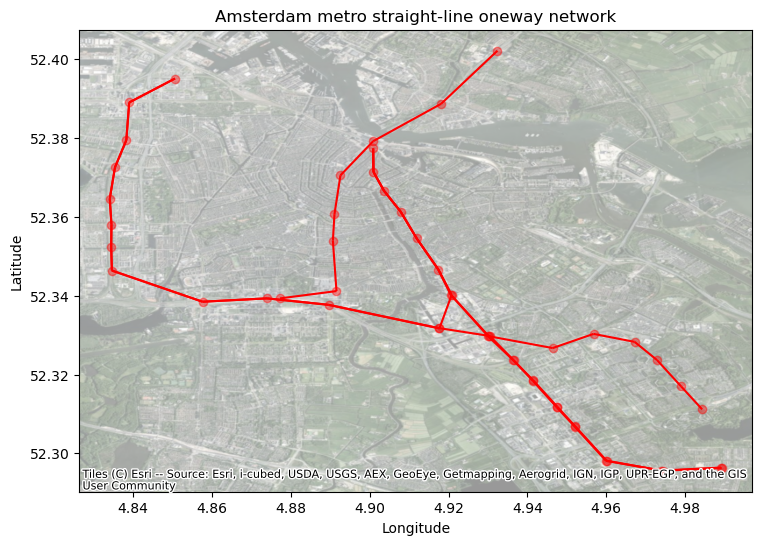

In [101]:
import contextily as ctx
city_sub_new_half_stations_straight_line_df = gpd.GeoDataFrame(city_sub_new_half_stations_straight_line_df.copy(), geometry='geometry')
city_sub_new_half_edges_straight_line_df = gpd.GeoDataFrame(city_sub_new_half_edges_straight_line_df.copy(), geometry='geometry')


fig, ax = plt.subplots(1, 1, figsize=(10, 6))

city_sub_new_half_stations_straight_line_df.plot(color='red', alpha=0.4, ax=ax, legend=True)
city_sub_new_half_edges_straight_line_df.plot(color='red', ax=ax, legend=True)
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

ax.set_title('Amsterdam metro straight-line oneway network')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


plt.show()

## Tram network

In [102]:
city_tram_new_half_order_route_dict = new_half_order_route_dict(city_tram_order_route_dict, city_tram_new_stations)
city_tram_new_half_stations_straight_line_df = new_half_stations_straight_line_df(city_tram_new_half_order_route_dict)
city_tram_new_half_edges_straight_line_df = new_edges_straight_line_df(city_tram_new_half_order_route_dict,14000)

In [103]:
city_tram_new_half_stations_straight_line_df

geometry    id  degree                       name  \
0    POINT (4.9326128 52.3607965)  2209       2         Muiderpoortstation   
1    POINT (4.9289422 52.3609314)  2371       2               Dapperstraat   
2    POINT (4.9257029 52.3601162)  2474       2             Linnaeusstraat   
3    POINT (4.9167422 52.3590732)  2480       2                  Beukenweg   
4    POINT (4.9135923 52.3623479)  2466       2  Korte 's-Gravesandestraat   
..                            ...   ...     ...                        ...   
234  POINT (4.8312794 52.3798913)  2526       2    Burgemeester Fockstraat   
235    POINT (4.8258104 52.38075)  2533       2   Burgemeester Eliasstraat   
236  POINT (4.8211591 52.3808373)  2528       2              Plein '40-'45   
237  POINT (4.8187509 52.3750672)  2509       2   Burgemeester Roëllstraat   
238  POINT (4.8186019 52.3728449)  1090       2                 Sloterpark   

        geo_x      geo_y         coordinate_value  \
0    4.932613  52.360796  (4.9326128, 52.3607965)   
1    4.928942  52.360931  (4.9289422, 52.3609314)   
2    4.925703  52.360116  (4.9257029, 52.3601162)   
3    4.916742  52.359073  (4.9167422, 52.3590732)   
4    4.913592  52.362348  (4.9135923, 52.3623479)   
..        ...        ...                      ...   
234  4.831279  52.379891  (4.8312794, 52.3798913)   
235  4.825810  52.380750    (4.8258104, 52.38075)   
236  4.821159  52.380837  (4.8211591, 52.3808373)   
237  4.818751  52.375067  (4.8187509, 52.3750672)   
238  4.818602  52.372845  (4.8186019, 52.3728449)   

                                       route_name_list route       ref  \
0    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
1    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
2    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
3    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
4    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram  1, 19, 7   
..                                                 ...   ...       ...   
234  Tram 7: Amsterdam Azartplein => Amsterdam Slot...  tram         7   
235  Tram 7: Amsterdam Azartplein => Amsterdam Slot...  tram         7   
236  Tram 7: Amsterdam Azartplein => Amsterdam Slot...  tram         7   
237  Tram 7: Amsterdam Azartplein => Amsterdam Slot...  tram         7   
238  Tram 7: Amsterdam Azartplein => Amsterdam Slot...  tram         7   

     transfer  
0        1, 3  
1        1, 3  
2        1, 3  
3        1, 3  
4    1, 19, 7  
..        ...  
234      None  
235      None  
236      None  
237      None  
238      None  

[239 rows x 11 columns]

In [104]:
city_tram_new_half_edges_straight_line_df

geometry from_id to_id  \
0   LINESTRING (4.9326128 52.3607965, 4.9289422 52...    2209  2371   
1   LINESTRING (4.9289422 52.3609314, 4.9257029 52...    2371  2474   
2   LINESTRING (4.9257029 52.3601162, 4.9167422 52...    2474  2480   
3   LINESTRING (4.9167422 52.3590732, 4.9135923 52...    2480  2466   
4   LINESTRING (4.9135923 52.3623479, 4.9071213 52...    2466  2448   
..                                                ...     ...   ...   
23  LINESTRING (4.8372054 52.378963, 4.8312794 52....    2529  2526   
24  LINESTRING (4.8312794 52.3798913, 4.8258104 52...    2526  2533   
25  LINESTRING (4.8258104 52.38075, 4.8211591 52.3...    2533  2528   
26  LINESTRING (4.8211591 52.3808373, 4.8187509 52...    2528  2509   
27  LINESTRING (4.8187509 52.3750672, 4.8186019 52...    2509  1090   

                                      route_name_list     distance time  \
0   Tram 1: Amsterdam Muiderpoortstation =>Amsterd...   409.348586    2   
1   Tram 1: Amsterdam Muiderpoortstation =>Amsterd...   390.015159    2   
2   Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  1015.456797    4   
3   Tram 1: Amsterdam Muiderpoortstation =>Amsterd...   692.298386    3   
4   Tram 1: Amsterdam Muiderpoortstation =>Amsterd...   760.977104    3   
..                                                ...          ...  ...   
23  Tram 7: Amsterdam Azartplein => Amsterdam Slot...    681.05427    3   
24  Tram 7: Amsterdam Azartplein => Amsterdam Slot...   628.623894    3   
25  Tram 7: Amsterdam Azartplein => Amsterdam Slot...   518.025056    2   
26  Tram 7: Amsterdam Azartplein => Amsterdam Slot...  1085.828215    5   
27  Tram 7: Amsterdam Azartplein => Amsterdam Slot...   405.553384    2   

   weights  
0      409  
1      390  
2     1015  
3      692  
4      761  
..     ...  
23     681  
24     629  
25     518  
26    1086  
27     406  

[275 rows x 7 columns]

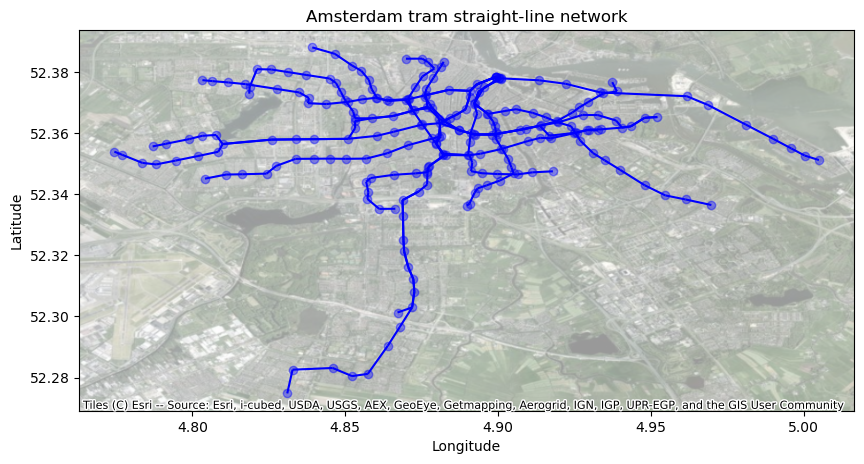

In [105]:
import contextily as ctx
city_tram_new_half_stations_straight_line_gdf = gpd.GeoDataFrame(city_tram_new_half_stations_straight_line_df.copy(), geometry='geometry')
city_tram_new_half_edges_straight_line_gdf = gpd.GeoDataFrame(city_tram_new_half_edges_straight_line_df.copy(), geometry='geometry')


fig, ax = plt.subplots(1, 1, figsize=(10, 6))

city_tram_new_half_stations_straight_line_gdf.plot(color='blue', alpha=0.4, ax=ax, legend=True)
city_tram_new_half_edges_straight_line_gdf.plot(color='blue', ax=ax, legend=True)
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

ax.set_title('Amsterdam tram straight-line network')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


plt.show()

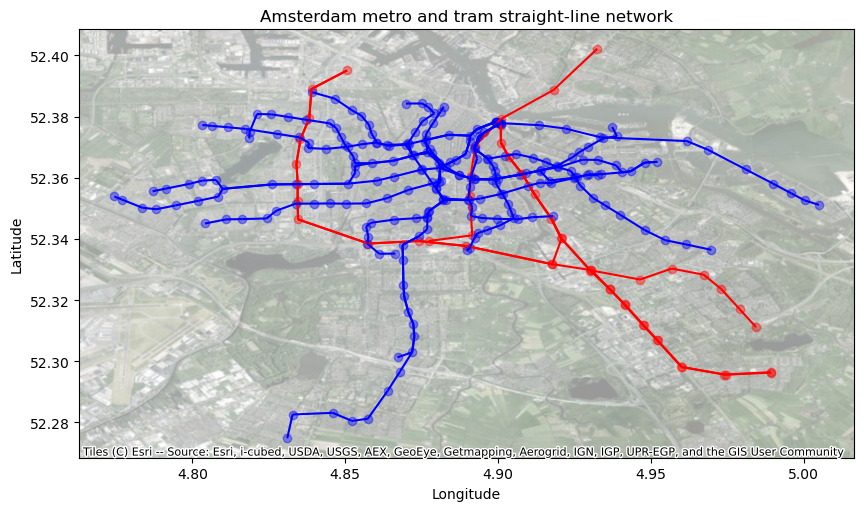

In [106]:
import contextily as ctx
city_sub_new_half_stations_straight_line_gdf = gpd.GeoDataFrame(city_sub_new_half_stations_straight_line_df.copy(), geometry='geometry')
city_sub_new_half_edges_straight_line_gdf = gpd.GeoDataFrame(city_sub_new_half_edges_straight_line_df.copy(), geometry='geometry')
city_tram_new_half_stations_straight_line_gdf = gpd.GeoDataFrame(city_tram_new_half_stations_straight_line_df.copy(), geometry='geometry')
city_tram_new_half_edges_straight_line_gdf = gpd.GeoDataFrame(city_tram_new_half_edges_straight_line_df.copy(), geometry='geometry')

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

city_sub_new_half_stations_straight_line_gdf.plot(color='red', alpha=0.4, ax=ax, legend=True)
city_sub_new_half_edges_straight_line_gdf.plot(color='red', ax=ax, legend=True)
city_tram_new_half_stations_straight_line_gdf.plot(color='blue', alpha=0.4, ax=ax, legend=True)
city_tram_new_half_edges_straight_line_gdf.plot(color='blue', ax=ax, legend=True)
metro_lines = gpd.read_file("./Metro lines.GPKG")
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.4)

ax.set_title('Amsterdam metro and tram straight-line network')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


plt.show()

## Create Connecting Edges in one network

In [107]:
def new_half_transfer_stations_name_list(city_sub_new_half_stations_straight_line_df):
    duplicate_names = city_sub_new_half_stations_straight_line_df['name'][city_sub_new_half_stations_straight_line_df['name'].duplicated()].drop_duplicates(ignore_index=True)
    duplicate_names_list = duplicate_names.tolist()
    return duplicate_names_list

In [108]:
def half_create_connect_edges_one_network(connect_stations, id_edges_length_sub, city_sub_new_edges):
    # Extract IDs of connecting stations
    id_list = list(connect_stations['id'])
    # Generate all possible pairs of station IDs
    # id_pairs_list = list(permutations(id_list, 2))
    id_pairs_list = list(combinations(id_list, 2))

    # Extract coordinates of connecting stations
    connect_station_coordinate_list = list(connect_stations['coordinate_value'])
    # Create LineString segments for connecting edges
    # line_segments = [LineString(pair) for pair in permutations(connect_station_coordinate_list, 2)]
    line_segments = [LineString(pair) for pair in combinations(connect_station_coordinate_list, 2)]
    
    connect_stations = gpd.GeoDataFrame(connect_stations, geometry='geometry', crs='EPSG:4326')
    # Define the coordinate reference systems (CRS)
    crs_deg = 'EPSG:4326'  # WGS 84, the standard coordinate system for GPS
    crs_meter = 'EPSG:3857'  # World Mercator, commonly used for distance calculations

    # Create a transformer to convert from degrees to meters
    transformer = Transformer.from_crs(crs_deg, crs_meter, always_xy=True)

    # Apply the transformer to each Point in the 'geometry' column
    connect_stations['geometry_3857'] = connect_stations['geometry'].apply(lambda point: Point(transformer.transform(point.x, point.y)))
    connect_stations_geometry_list = list(connect_stations['geometry_3857'])
    # distance_list = [LineString(pair).length for pair in permutations(connect_stations_geometry_list, 2)]
    distance_list = [LineString(pair).length for pair in combinations(connect_stations_geometry_list, 2)]
    

    # Create a DataFrame to store information about connecting edges
    connect_edges = pd.DataFrame({
        'from_id': [pair[0] for pair in id_pairs_list],
        'to_id': [pair[1] for pair in id_pairs_list],
        'from_to': id_pairs_list,
        'to_from': [(pair[1], pair[0]) for pair in id_pairs_list],
        'geometry': line_segments,
        'distance': distance_list
    })
    
    # Only keep the links which are less than 500meters
    connect_edges = connect_edges[connect_edges['distance'] <= 500].reset_index(drop=True)
    
    # Assign unique IDs to connecting edges
    connect_edges_id_list = [id_edges_length_sub] + [i for i in range(id_edges_length_sub + 1, id_edges_length_sub + len(connect_edges))]
    connect_edges['id'] = connect_edges_id_list
    
    # Set weights attribute of connecting edges to a value higher than the maximum value in city_sub_new_edges
    connect_edges['weights'] = city_sub_new_edges.sort_values(by='weights').weights.iloc[-1] + 1
    # Set time attribute of connecting edges to a value higher than the maximum value in city_sub_new_edges
    connect_edges['time'] = city_sub_new_edges.sort_values(by='time').time.iloc[-1] + 0.1
    
    # Return the DataFrame containing information about the connecting edges
    return connect_edges


def half_connected_all_edges_dataframe(connect_stations_name, city_sub_new_stations, id_edges_length_sub, city_sub_new_edges):
    """
    Creates a DataFrame of connected edges between subway stations.

    Parameters:
        connect_stations_name (list): List of station names that connect different lines.
        city_sub_new_stations (pandas.DataFrame): DataFrame containing subway station data.
        id_edges_length_sub (int): Initial ID for edges in the subway network.
        city_sub_new_edges (pandas.DataFrame): DataFrame containing edges data.

    Returns:
        pandas.DataFrame: DataFrame of connected edges between subway stations.
    """
    connect_edges_dfs = {}
    # Iterate over each connecting station
    for i in range(len(connect_stations_name)):
        # Select DataFrame for the current connecting station
        connect_stations_df = city_sub_new_stations[city_sub_new_stations['name'] == connect_stations_name[i]]

        # Create edges for the current connecting station
        if i == 0:
            connect_edges = half_create_connect_edges_one_network(connect_stations_df, id_edges_length_sub, city_sub_new_edges)
            city_sub_connected_edges = pd.concat([city_sub_new_edges, connect_edges]).reset_index(drop=True)
            id_connected_edges_length_sub = id_edges_length_sub + len(connect_edges)
            # print(connect_edges)
        else:
            connect_edges = half_create_connect_edges_one_network(connect_stations_df, id_connected_edges_length_sub, city_sub_new_edges)
            city_sub_connected_edges = pd.concat([city_sub_connected_edges, connect_edges]).reset_index(drop=True)
            id_connected_edges_length_sub = id_connected_edges_length_sub + len(connect_edges)
            # print(connect_edges)
        connect_edges_dfs[connect_stations_name[i]] = connect_edges
        # Update ID for the next set of edges
        # print(id_connected_edges_length_sub)

    return city_sub_connected_edges, connect_edges_dfs

In [109]:
connecting_sub_stations_name_list = new_half_transfer_stations_name_list(city_sub_new_half_stations_straight_line_df)
connecting_sub_stations_name_list

['Overamstel',
 'Centraal Station',
 'Zuid',
 'Spaklerweg',
 'Van der Madeweg',
 'Duivendrecht',
 'Strandvliet',
 'Bijlmer ArenA',
 'Bullewijk',
 'Holendrecht',
 'Reigersbos',
 'Gein']

In [110]:
id_new_edges_length = city_tram_edges['id'].iloc[-1] + 1
id_new_edges_length

3166

In [111]:
city_sub_new_connected_edges_straight_line, city_sub_new_connect_edges_dfs_straight_line = half_connected_all_edges_dataframe(connecting_sub_stations_name_list,city_sub_new_half_stations_straight_line_df,id_new_edges_length,city_sub_new_half_edges_straight_line_df)

In [112]:
city_sub_new_connected_edges_straight_line

geometry from_id to_id  \
0   LINESTRING (4.98916 52.29641, 4.97400 52.29564)     328   855   
1   LINESTRING (4.97400 52.29564, 4.96013 52.29813)     855   854   
2   LINESTRING (4.96013 52.29813, 4.95213 52.30687)     854   810   
3   LINESTRING (4.95213 52.30687, 4.94762 52.31181)     810   809   
4   LINESTRING (4.94762 52.31181, 4.94140 52.31861)     809   808   
..                                              ...     ...   ...   
80  LINESTRING (4.94762 52.31181, 4.94740 52.31173)     809   814   
81  LINESTRING (4.95213 52.30687, 4.95200 52.30679)     810   850   
82  LINESTRING (4.96013 52.29813, 4.95996 52.29809)     854   853   
83  LINESTRING (4.97400 52.29564, 4.97438 52.29560)     855   144   
84  LINESTRING (4.98916 52.29641, 4.98930 52.29627)     328   323   

                  route_name_list     distance time weights     from_to  \
0   Metro 50: Gein => Isolatorweg  1693.527311    4    1694         NaN   
1   Metro 50: Gein => Isolatorweg  1609.832708    4    1610         NaN   
2   Metro 50: Gein => Isolatorweg  1822.740985    4    1823         NaN   
3   Metro 50: Gein => Isolatorweg  1029.674063    2    1030         NaN   
4   Metro 50: Gein => Isolatorweg  1419.649855    3    1420         NaN   
..                            ...          ...  ...     ...         ...   
80                            NaN    28.216583  8.1    3317  (809, 814)   
81                            NaN    20.287389  8.1    3317  (810, 850)   
82                            NaN    20.341511  8.1    3317  (854, 853)   
83                            NaN    42.619359  8.1    3317  (855, 144)   
84                            NaN    29.060429  8.1    3317  (328, 323)   

       to_from      id  
0          NaN     NaN  
1          NaN     NaN  
2          NaN     NaN  
3          NaN     NaN  
4          NaN     NaN  
..         ...     ...  
80  (814, 809)  3175.0  
81  (850, 810)  3176.0  
82  (853, 854)  3177.0  
83  (144, 855)  3178.0  
84  (323, 328)  3179.0  

[85 rows x 10 columns]

In [113]:
connecting_tram_stations_name_list = new_half_transfer_stations_name_list(city_tram_new_half_stations_straight_line_df)
connecting_tram_stations_name_list

['Centraal Station',
 'Dam',
 'Bilderdijkstraat',
 'Hoekenes',
 'Baden Powellweg',
 'Jan van Galenstraat',
 'Admiraal De Ruijterweg',
 'Willem de Zwijgerlaan',
 'Elandsgracht',
 'Leidseplein',
 'Rijksmuseum',
 'Vijzelgracht',
 'Frederiksplein',
 'Weesperplein',
 "Korte 's-Gravesandestraat",
 'Johan Huizingalaan',
 'De Pijp',
 'Roelof Hartplein',
 'Amstelveenseweg',
 'Beukenweg',
 'Linnaeusstraat',
 'Dapperstraat',
 'Muiderpoortstation',
 'Maasstraat',
 'Waalstraat',
 'Victorieplein',
 'Prinsengracht',
 'Keizersgracht',
 'Rembrandtplein',
 'Rokin',
 'Stadionweg',
 'Gerrit van der Veenstraat',
 'Concertgebouw',
 'Museumplein',
 'Rietlandpark',
 'Alexanderplein',
 'Postjesweg',
 'Mercatorplein']

In [114]:
id_new_edges_length = int(city_sub_new_connected_edges_straight_line['id'].iloc[-1] + 1)
id_new_edges_length

3180

In [115]:
city_tram_new_connected_edges_straight_line, city_tram_new_connect_edges_dfs_straight_line = half_connected_all_edges_dataframe(connecting_tram_stations_name_list,city_tram_new_half_stations_straight_line_df,id_new_edges_length,city_tram_new_half_edges_straight_line_df)

In [116]:
city_tram_new_connected_edges_straight_line

geometry from_id to_id  \
0    LINESTRING (4.9326128 52.3607965, 4.9289422 52...    2209  2371   
1    LINESTRING (4.9289422 52.3609314, 4.9257029 52...    2371  2474   
2    LINESTRING (4.9257029 52.3601162, 4.9167422 52...    2474  2480   
3    LINESTRING (4.9167422 52.3590732, 4.9135923 52...    2480  2466   
4    LINESTRING (4.9135923 52.3623479, 4.9071213 52...    2466  2448   
..                                                 ...     ...   ...   
346  LINESTRING (4.8806042 52.3587143, 4.8812446 52...    2769  2407   
347  LINESTRING (4.9334664 52.3732299, 4.9344045 52...    2429  2678   
348  LINESTRING (4.9196097 52.3634343, 4.9192366 52...    2597  2465   
349  LINESTRING (4.8531487 52.3638557, 4.8531786 52...    2696  2402   
350  LINESTRING (4.8507957 52.3701459, 4.8499792 52...    2507  2757   

                                       route_name_list     distance  time  \
0    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...   409.348586     2   
1    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...   390.015159     2   
2    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  1015.456797     4   
3    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...   692.298386     3   
4    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...   760.977104     3   
..                                                 ...          ...   ...   
346                                                NaN    75.700359  14.1   
347                                                NaN   118.649631  14.1   
348                                                NaN    90.196585  14.1   
349                                                NaN   167.238821  14.1   
350                                                NaN   133.447752  14.1   

    weights       from_to       to_from      id  
0       409           NaN           NaN     NaN  
1       390           NaN           NaN     NaN  
2      1015           NaN           NaN     NaN  
3       692           NaN           NaN     NaN  
4       761           NaN           NaN     NaN  
..      ...           ...           ...     ...  
346    3152  (2769, 2407)  (2407, 2769)  3251.0  
347    3152  (2429, 2678)  (2678, 2429)  3252.0  
348    3152  (2597, 2465)  (2465, 2597)  3253.0  
349    3152  (2696, 2402)  (2402, 2696)  3254.0  
350    3152  (2507, 2757)  (2757, 2507)  3255.0  

[351 rows x 10 columns]

## Create Connecting Edges in 300m between Metro and Tram

In [117]:
buffer_radius = 300

In [118]:
sub_new_stations_buffer_geometry = new_nodes_buffer(city_sub_new_half_stations_straight_line_df,buffer_radius)
sub_new_stations_buffer_geometry

geometry   id  degree                 name  \
0   POINT (555390.884 6853898.052)  328       2                 Gein   
1   POINT (553703.169 6853757.861)  855       2           Reigersbos   
2   POINT (552158.745 6854212.080)  854       2          Holendrecht   
3   POINT (551268.501 6855802.630)  810       2            Bullewijk   
4   POINT (550766.294 6856701.528)  809       2        Bijlmer ArenA   
5   POINT (550073.876 6857940.867)  808       2          Strandvliet   
6   POINT (549535.357 6858849.748)  852       2         Duivendrecht   
7   POINT (548855.673 6859975.823)  828       2      Van der Madeweg   
8   POINT (547425.429 6860337.251)  838       2           Overamstel   
9   POINT (544300.992 6861415.782)  857       2          Station RAI   
10  POINT (542567.113 6861713.359)  840       2                 Zuid   
11  POINT (540742.319 6861559.003)  835       2      Amstelveenseweg   
12  POINT (538182.327 6863000.593)  841       2    Henk Sneevlietweg   
13  POINT (538163.058 6864083.509)   19       2      Heemstedestraat   
14  POINT (538170.371 6865128.310)  843       2             Lelylaan   
15  POINT (538122.237 6866319.507)  848       2           Postjesweg   
16  POINT (538270.247 6867775.387)  846       2  Jan van Galenstraat   
17  POINT (538589.634 6869027.537)  844       2         De Vlugtlaan   
18  POINT (538672.634 6870776.421)  121       2   Station Sloterdijk   
19  POINT (539965.854 6871882.876)  805       2          Isolatorweg   
20  POINT (545562.197 6868645.716)  731       2     Centraal Station   
21  POINT (545569.911 6867564.283)  867       2           Nieuwmarkt   
22  POINT (545866.934 6866691.428)  459       2        Waterlooplein   
23  POINT (546339.051 6865720.341)  460       2         Weesperplein   
24  POINT (546789.684 6864490.120)  260       2         Wibautstraat   
25  POINT (547403.121 6863046.022)  819       2        Amstelstation   
26  POINT (547780.995 6861879.615)  831       2           Spaklerweg   
27  POINT (547432.320 6860323.588)  837       2           Overamstel   
28  POINT (549072.479 6873169.821)  630       2                Noord   
29  POINT (547481.657 6870714.532)  818       2          Noorderpark   
30  POINT (545563.299 6868983.734)  816       2     Centraal Station   
31  POINT (544637.722 6867402.978)  813       2                Rokin   
32  POINT (544468.850 6865606.813)  861       2         Vijzelgracht   
33  POINT (544424.400 6864380.473)  863       2              De Pijp   
34  POINT (544526.024 6862051.560)  860       2          Europaplein   
35  POINT (542931.050 6861712.594)  180       3                 Zuid   
36  POINT (547760.256 6861871.617)  830       2           Spaklerweg   
37  POINT (548831.706 6859963.564)  826       2      Van der Madeweg   
38  POINT (550631.742 6859417.784)  811       2         Venserpolder   
39  POINT (551785.647 6860071.748)  822       2  Station Diemen Zuid   
40  POINT (552946.865 6859703.575)   54       2    Verrijn Stuartweg   
41  POINT (553579.237 6858863.571)   56       2           Ganzenhoef   
42  POINT (554260.557 6857643.484)  812       2          Kraaiennest   
43  POINT (554854.091 6856584.176)   61       2          Gaasperplas   
44  POINT (548813.361 6859952.161)  825       2      Van der Madeweg   
45  POINT (549523.991 6858842.918)  851       2         Duivendrecht   
46  POINT (550076.336 6857895.376)  856       2          Strandvliet   
47  POINT (550741.592 6856687.890)  814       2        Bijlmer ArenA   
48  POINT (551254.285 6855788.156)  850       2            Bullewijk   
49  POINT (552139.932 6854204.344)  853       2          Holendrecht   
50  POINT (553745.159 6853750.562)  144       2           Reigersbos   
51  POINT (555406.224 6853873.370)  323       2                 Gein   

       geo_x      geo_y         coordinate_value  \
0   4.989161  52.296407  (4.9891612, 52.2964067)   
1   4.974000  52.295637  (4.9740002, 52.2956365)   
2   4.960126  52.298132  (4.9601264, 52.2981319)   
3

In [119]:
city_tram_new_stations_ftn = add_footnote_to_new_nodes(city_tram_new_half_stations_straight_line_df)
city_tram_new_stations_ftn

geometry_tram  id_tram  degree_tram  \
0    POINT (549095.9451763834 6865626.846179629)     2209            2   
1    POINT (548687.3358534776 6865651.436549241)     2371            2   
2    POINT (548326.7386269509 6865502.838217197)     2474            2   
3    POINT (547329.2380657996 6865312.719471466)     2480            2   
4     POINT (546978.5928017499 6865909.64907751)     2466            2   
..                                           ...      ...          ...   
234  POINT (537815.5626880322 6869108.306275565)     2526            2   
235  POINT (537206.7563928838 6869264.904153384)     2533            2   
236  POINT (536688.9760453572 6869280.824895416)     2528            2   
237  POINT (536420.8964476287 6868228.609973954)     2509            2   
238  POINT (536404.3098435005 6867823.395916868)     1090            2   

                     name_tram  geo_x_tram  geo_y_tram  \
0           Muiderpoortstation    4.932613   52.360796   
1                 Dapperstraat    4.928942   52.360931   
2               Linnaeusstraat    4.925703   52.360116   
3                    Beukenweg    4.916742   52.359073   
4    Korte 's-Gravesandestraat    4.913592   52.362348   
..                         ...         ...         ...   
234    Burgemeester Fockstraat    4.831279   52.379891   
235   Burgemeester Eliasstraat    4.825810   52.380750   
236              Plein '40-'45    4.821159   52.380837   
237   Burgemeester Roëllstraat    4.818751   52.375067   
238                 Sloterpark    4.818602   52.372845   

       coordinate_value_tram  \
0    (4.9326128, 52.3607965)   
1    (4.9289422, 52.3609314)   
2    (4.9257029, 52.3601162)   
3    (4.9167422, 52.3590732)   
4    (4.9135923, 52.3623479)   
..                       ...   
234  (4.8312794, 52.3798913)   
235    (4.8258104, 52.38075)   
236  (4.8211591, 52.3808373)   
237  (4.8187509, 52.3750672)   
238  (4.8186019, 52.3728449)   

                                  route_name_list_tram route_tram  ref_tram  \
0    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...       tram      1, 3   
1    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...       tram      1, 3   
2    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...       tram      1, 3   
3    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...       tram      1, 3   
4    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...       tram  1, 19, 7   
..                                                 ...        ...       ...   
234  Tram 7: Amsterdam Azartplein => Amsterdam Slot...       tram         7   
235  Tram 7: Amsterdam Azartplein => Amsterdam Slot...       tram         7   
236  Tram 7: Amsterdam Azartplein => Amsterdam Slot...       tram         7   
237  Tram 7: Amsterdam Azartplein => Amsterdam Slot...       tram         7   
238  Tram 7: Amsterdam Azartplein => Amsterdam Slot...       tram         7   

    transfer_tram  
0            1, 3  
1            1, 3  
2            1, 3  
3            1, 3  
4        1, 19, 7  
..            ...  
234          None  
235          None  
236          None  
237          None  
238          None  

[239 rows x 11 columns]

In [120]:
def transfer_A_to_B_oneway(A_new_nodes_buffer_geometry,B_new_nodes_ftn):
    transfer_stations_A_to_B = pd.DataFrame()
    
    for index, row in A_new_nodes_buffer_geometry.iterrows():
        each_transfer_stations_df = B_new_nodes_ftn[row['buffer_geometry'].intersects(B_new_nodes_ftn.iloc[:, 0])]
        
        if not each_transfer_stations_df.empty:
            replicated_row = pd.concat([row] * len(each_transfer_stations_df), axis=1).transpose()
            replicated_row.reset_index(drop=True, inplace=True)  # Reset the index
            each_transfer_stations_df.reset_index(drop=True, inplace=True)  # Reset the index
            co_df = pd.concat([replicated_row,each_transfer_stations_df], axis=1)
            transfer_stations_A_to_B = pd.concat([transfer_stations_A_to_B,co_df])

    transfer_stations_A_to_B = transfer_stations_A_to_B.sort_values(by='name')
    transfer_stations_A_to_B.reset_index(drop=True,inplace=True)
       

    return transfer_stations_A_to_B

In [121]:
transfer_stations_sub_to_tram_oneway = transfer_A_to_B_oneway(sub_new_stations_buffer_geometry,city_tram_new_stations_ftn)
transfer_stations_sub_to_tram_oneway

geometry   id degree  \
0   POINT (547403.1208118391 6863046.022174509)  819      2   
1   POINT (540742.3190802236 6861559.002901717)  835      2   
2   POINT (545562.1969967436 6868645.715657004)  731      2   
3   POINT (545563.2990597024 6868983.734081826)  816      2   
4   POINT (545563.2990597024 6868983.734081826)  816      2   
5   POINT (545563.2990597024 6868983.734081826)  816      2   
6   POINT (545563.2990597024 6868983.734081826)  816      2   
7   POINT (545563.2990597024 6868983.734081826)  816      2   
8   POINT (545563.2990597024 6868983.734081826)  816      2   
9   POINT (545562.1969967436 6868645.715657004)  731      2   
10  POINT (545562.1969967436 6868645.715657004)  731      2   
11  POINT (545562.1969967436 6868645.715657004)  731      2   
12  POINT (545563.2990597024 6868983.734081826)  816      2   
13  POINT (545563.2990597024 6868983.734081826)  816      2   
14  POINT (545562.1969967436 6868645.715657004)  731      2   
15  POINT (545562.1969967436 6868645.715657004)  731      2   
16  POINT (545562.1969967436 6868645.715657004)  731      2   
17  POINT (545562.1969967436 6868645.715657004)  731      2   
18  POINT (544424.4004813455 6864380.473447215)  863      2   
19  POINT (544424.4004813455 6864380.473447215)  863      2   
20  POINT (538589.6338992123 6869027.537464746)  844      2   
21  POINT (544526.0240444907 6862051.560162962)  860      2   
22  POINT (544526.0240444907 6862051.560162962)  860      2   
23   POINT (538163.0576104926 6864083.50866388)   19      2   
24  POINT (538270.2471481774 6867775.387160625)  846      2   
25  POINT (538170.3713010377 6865128.310398296)  843      2   
26  POINT (544637.7220215526 6867402.978026113)  813      2   
27  POINT (544637.7220215526 6867402.978026113)  813      2   
28   POINT (544300.991693852 6861415.781777877)  857      2   
29   POINT (544300.991693852 6861415.781777877)  857      2   
30  POINT (538672.6337115478 6870776.420804021)  121      2   
31  POINT (544468.8503540193 6865606.813013325)  861      2   
32  POINT (544468.8503540193 6865606.813013325)  861      2   
33  POINT (544468.8503540193 6865606.813013325)  861      2   
34  POINT (545866.9341027902 6866691.428179977)  459      2   
35  POINT (546339.0511951934 6865720.341024122)  460      2   
36  POINT (546339.0511951934 6865720.341024122)  460      2   
37  POINT (542567.1127011032 6861713.358806675)  840      2   

                   name     geo_x      geo_y         coordinate_value  \
0         Amstelstation  4.917406  52.346636  (4.9174059, 52.3466361)   
1       Amstelveenseweg  4.857571  52.338475  (4.8575709, 52.3384751)   
2      Centraal Station  4.900869  52.377355  (4.9008686, 52.3773546)   
3      Centraal Station  4.900879  52.379208  (4.9008785, 52.3792082)   
4      Centraal Station  4.900879  52.379208  (4.9008785, 52.3792082)   
5      Centraal Station  4.900879  52.379208  (4.9008785, 52.3792082)   
6      Centraal Station  4.900879  52.379208  (4.9008785, 52.3792082)   
7      Centraal Station  4.900879  52.379208  (4.9008785, 52.3792082)   
8      Centraal Station  4.900879  52.379208  (4.9008785, 52.3792082)   
9      Centraal Station  4.900869  52.377355  (4.9008686, 52.3773546)   
10     Centraal Station  4.900869  52.377355  (4.9008686, 52.3773546)   
11     Centraal Station  4.900869  52.377355  (4.9008686, 52.3773546)   
12     Centraal Station  4.900879  52.379208  (4.9008785, 52.3792082)   
13     Centraal Station  4.900879  52.379208  (4.9008785, 52.3792082)   
14     Centraal Station  4.900869  52.377355  (4.9008686, 52.3773546)   
15     Centraal Station  4.900869  52.377355  (4.9008686, 52.3773546)   
16     Centraal Station  4.900869  52.377355  (4.9008686, 52.3773546)   
17     Centraal Station  4.900869  52.377355  (4.9008686, 52.3773546)   
18              De Pijp  4.890648  52.353958  (4.8906476, 52.3539585)   
19              De Pijp  4.890648  52.353958  (4.8906476, 52.3539585)   
20         De Vlugtlaan  4.838233  52.379448   (

In [122]:
# transfer_stations_sub_to_tram_oneway.loc[:,['name','name_tram']]

In [123]:
def create_connect_edges_oneway(transfer_stations_sub_to_tram):
    
    lines1 = []
    from_id_list1 = []
    to_id_list1 = []


    for index, row in transfer_stations_sub_to_tram.iterrows():
        line = LineString([list(row.iloc[6]), list(row.iloc[18])])
        from_id = row.iloc[1]
        to_id = row.iloc[13]
    
        
        lines1.append(line)
        from_id_list1.append(from_id)
        to_id_list1.append(to_id)

    result_df1 = pd.DataFrame({'geometry': lines1,
                              'from_id':from_id_list1,
                              'to_id':to_id_list1})


    # lines2 = []
    # from_id_list2 = []
    # to_id_list2 = []


    # for index, row in transfer_stations_sub_to_tram.iterrows():
    #     line = LineString([list(row.iloc[18]), list(row.iloc[6])])
    #     from_id = row.iloc[13]
    #     to_id = row.iloc[1]
    
        
    #     lines2.append(line)
    #     from_id_list2.append(from_id)
    #     to_id_list2.append(to_id)

    # result_df2 = pd.DataFrame({'geometry': lines2,
    #                           'from_id':from_id_list2,
    #                           'to_id':to_id_list2}) 

    # result_df = pd.concat([result_df1,result_df2])
    result_df = result_df1
    result_df['from_to'] = list(zip(result_df.from_id,result_df.to_id))
    result_df['to_from'] = list(zip(result_df.to_id,result_df.from_id))
    return result_df

In [124]:
connect_edges_sub_to_tram_oneway = create_connect_edges_oneway(transfer_stations_sub_to_tram_oneway)
connect_edges_sub_to_tram_oneway

geometry  from_id  to_id  \
0   LINESTRING (4.9174059 52.3466361, 4.9178945 52...      819   2101   
1   LINESTRING (4.8575709 52.3384751, 4.8572486 52...      835   2515   
2   LINESTRING (4.9008686 52.3773546, 4.8993575 52...      731   2178   
3   LINESTRING (4.9008785 52.3792082, 4.8993575 52...      816   2178   
4   LINESTRING (4.9008785 52.3792082, 4.8991546 52...      816   2180   
5   LINESTRING (4.9008785 52.3792082, 4.9003629 52...      816   1544   
6   LINESTRING (4.9008785 52.3792082, 4.8992178 52...      816   2173   
7   LINESTRING (4.9008785 52.3792082, 4.8992878 52...      816   2177   
8   LINESTRING (4.9008785 52.3792082, 4.9009807 52...      816   2776   
9   LINESTRING (4.9008686 52.3773546, 4.9009807 52...      731   2776   
10  LINESTRING (4.9008686 52.3773546, 4.9009769 52...      731   1658   
11  LINESTRING (4.9008686 52.3773546, 4.9003819 52...      731   1359   
12  LINESTRING (4.9008785 52.3792082, 4.9003819 52...      816   1359   
13  LINESTRING (4.9008785 52.3792082, 4.9009769 52...      816   1658   
14  LINESTRING (4.9008686 52.3773546, 4.9003629 52...      731   1544   
15  LINESTRING (4.9008686 52.3773546, 4.8992178 52...      731   2173   
16  LINESTRING (4.9008686 52.3773546, 4.8992878 52...      731   2177   
17  LINESTRING (4.9008686 52.3773546, 4.8991546 52...      731   2180   
18  LINESTRING (4.8906476 52.3539585, 4.8905961 52...      863   2636   
19  LINESTRING (4.8906476 52.3539585, 4.8901771 52...      863   2722   
20  LINESTRING (4.838233 52.3794484, 4.8372054 52....      844   2529   
21  LINESTRING (4.8915605 52.3411785, 4.8922816 52...      860   2628   
22  LINESTRING (4.8915605 52.3411785, 4.893324 52....      860   2627   
23  LINESTRING (4.834401 52.3523291, 4.8337504 52....       19   2551   
24  LINESTRING (4.8353639 52.3725816, 4.8350051 52...      846   2687   
25  LINESTRING (4.8344667 52.3580615, 4.8337835 52...      843   2654   
26  LINESTRING (4.8925639 52.3705391, 4.8921252 52...      813   2583   
27  LINESTRING (4.8925639 52.3705391, 4.892274 52....      813   2584   
28  LINESTRING (4.889539 52.337689, 4.889801 52.33...      857   1663   
29  LINESTRING (4.889539 52.337689, 4.8906393 52.3...      857   2629   
30  LINESTRING (4.8389786 52.3890375, 4.8392172 52...      121   1502   
31  LINESTRING (4.8910469 52.3606866, 4.8921024 52...      861   2467   
32  LINESTRING (4.8910469 52.3606866, 4.8925358 52...      861   2742   
33  LINESTRING (4.8910469 52.3606866, 4.8909623 52...      861   2386   
34  LINESTRING (4.9036061 52.3666363, 4.9022284 52...      459   2586   
35  LINESTRING (4.9078472 52.3613094, 4.9091584 52...      460   2449   
36  LINESTRING (4.9078472 52.3613094, 4.9071213 52...      460   2448   
37  LINESTRING (4.8739633 52.3393223, 4.8739688 52...      840   2300   

        from_to      to_from  
0   (819, 2101)  (2101, 819)  
1   (835, 2515)  (2515, 835)  
2   (731, 2178)  (2178, 731)  
3   (816, 2178)  (2178, 816)  
4   (816, 2180)  (2180, 816)  
5   (816, 1544)  (1544, 816)  
6   (816, 2173)  (2173, 816)  
7   (816, 2177)  (2177, 816)  
8   (816, 2776)  (2776, 816)  
9   (731, 2776)  (2776, 731)  
10  (731, 1658)  (1658, 731)  
11  (731, 1359)  (1359, 731)  
12  (816, 1359)  (1359, 816)  
13  (816, 1658)  (1658, 816)  
14  (731, 1544)  (1544, 731)  
15  (731, 2173)  (2173, 731)  
16  (731, 2177)  (2177, 731)  
17  (731, 2180)  (2180, 731)  
18  (863, 2636)  (2636, 863)  
19  (863, 2722)  (2722, 863)  
20  (844, 2529)  (2529, 844)  
21  (860, 2628)  (2628, 860)  
22  (860, 2627)  (2627, 860)  
23   (19, 2551)   (2551, 19)  
24  (846, 2687)  (2687, 846)  
25  (843, 2654)  (2654, 843)  
26  (813, 2583)  (2583, 813)  
27  (813, 2584)  (2584, 813)  
28  (857, 1663)  (1663, 857)  
29  (857, 2629)  (2629, 857)  
30  (121, 1502)  (1502, 121)  
31  (861, 2467)  (2467, 861)  
32  (861, 2742)  (2742, 861)  
33  (861, 2386)  (2386, 861)  
34  (459, 2586)  (2586, 459)  
35  (460, 2449)  (2449, 460)  
36  (460, 2448)  (2448, 460)  
37  (840, 2300)  (2

In [125]:
start_id_for_connect_edges_sub_to_tram = int(city_tram_new_connected_edges_straight_line['id'].iloc[-1] + 1)
start_id_for_connect_edges_sub_to_tram

3256

In [126]:
connect_edges_sub_to_tram_id_list = [start_id_for_connect_edges_sub_to_tram] + [i for i in range(start_id_for_connect_edges_sub_to_tram + 1, start_id_for_connect_edges_sub_to_tram + len(connect_edges_sub_to_tram_oneway))]
# connect_edges_sub_to_tram_id_list

In [127]:
connect_edges_sub_to_tram_oneway['id'] = connect_edges_sub_to_tram_id_list

# Set weights attribute of connecting edges to a value higher than the maximum value in city_sub_new_edges
connect_edges_sub_to_tram_oneway['distance'] = city_sub_new_edges.sort_values(by='weights').weights.iloc[-1] + city_tram_new_edges.sort_values(by='weights').weights.iloc[-1] + 10000000000
connect_edges_sub_to_tram_oneway['weights'] = city_sub_new_edges.sort_values(by='weights').weights.iloc[-1] + city_tram_new_edges.sort_values(by='weights').weights.iloc[-1] + 10000000000
# Set time attribute of connecting edges to a value higher than the maximum value in city_sub_new_edges
connect_edges_sub_to_tram_oneway['time'] = city_sub_new_edges.sort_values(by='time').time.iloc[-1] + city_tram_new_edges.sort_values(by='time').time.iloc[-1] + 1

In [128]:
connect_edges_sub_to_tram_oneway

geometry  from_id  to_id  \
0   LINESTRING (4.9174059 52.3466361, 4.9178945 52...      819   2101   
1   LINESTRING (4.8575709 52.3384751, 4.8572486 52...      835   2515   
2   LINESTRING (4.9008686 52.3773546, 4.8993575 52...      731   2178   
3   LINESTRING (4.9008785 52.3792082, 4.8993575 52...      816   2178   
4   LINESTRING (4.9008785 52.3792082, 4.8991546 52...      816   2180   
5   LINESTRING (4.9008785 52.3792082, 4.9003629 52...      816   1544   
6   LINESTRING (4.9008785 52.3792082, 4.8992178 52...      816   2173   
7   LINESTRING (4.9008785 52.3792082, 4.8992878 52...      816   2177   
8   LINESTRING (4.9008785 52.3792082, 4.9009807 52...      816   2776   
9   LINESTRING (4.9008686 52.3773546, 4.9009807 52...      731   2776   
10  LINESTRING (4.9008686 52.3773546, 4.9009769 52...      731   1658   
11  LINESTRING (4.9008686 52.3773546, 4.9003819 52...      731   1359   
12  LINESTRING (4.9008785 52.3792082, 4.9003819 52...      816   1359   
13  LINESTRING (4.9008785 52.3792082, 4.9009769 52...      816   1658   
14  LINESTRING (4.9008686 52.3773546, 4.9003629 52...      731   1544   
15  LINESTRING (4.9008686 52.3773546, 4.8992178 52...      731   2173   
16  LINESTRING (4.9008686 52.3773546, 4.8992878 52...      731   2177   
17  LINESTRING (4.9008686 52.3773546, 4.8991546 52...      731   2180   
18  LINESTRING (4.8906476 52.3539585, 4.8905961 52...      863   2636   
19  LINESTRING (4.8906476 52.3539585, 4.8901771 52...      863   2722   
20  LINESTRING (4.838233 52.3794484, 4.8372054 52....      844   2529   
21  LINESTRING (4.8915605 52.3411785, 4.8922816 52...      860   2628   
22  LINESTRING (4.8915605 52.3411785, 4.893324 52....      860   2627   
23  LINESTRING (4.834401 52.3523291, 4.8337504 52....       19   2551   
24  LINESTRING (4.8353639 52.3725816, 4.8350051 52...      846   2687   
25  LINESTRING (4.8344667 52.3580615, 4.8337835 52...      843   2654   
26  LINESTRING (4.8925639 52.3705391, 4.8921252 52...      813   2583   
27  LINESTRING (4.8925639 52.3705391, 4.892274 52....      813   2584   
28  LINESTRING (4.889539 52.337689, 4.889801 52.33...      857   1663   
29  LINESTRING (4.889539 52.337689, 4.8906393 52.3...      857   2629   
30  LINESTRING (4.8389786 52.3890375, 4.8392172 52...      121   1502   
31  LINESTRING (4.8910469 52.3606866, 4.8921024 52...      861   2467   
32  LINESTRING (4.8910469 52.3606866, 4.8925358 52...      861   2742   
33  LINESTRING (4.8910469 52.3606866, 4.8909623 52...      861   2386   
34  LINESTRING (4.9036061 52.3666363, 4.9022284 52...      459   2586   
35  LINESTRING (4.9078472 52.3613094, 4.9091584 52...      460   2449   
36  LINESTRING (4.9078472 52.3613094, 4.9071213 52...      460   2448   
37  LINESTRING (4.8739633 52.3393223, 4.8739688 52...      840   2300   

        from_to      to_from    id     distance      weights     time  
0   (819, 2101)  (2101, 819)  3256  10000002763  10000002763  1.16254  
1   (835, 2515)  (2515, 835)  3257  10000002763  10000002763  1.16254  
2   (731, 2178)  (2178, 731)  3258  10000002763  10000002763  1.16254  
3   (816, 2178)  (2178, 816)  3259  10000002763  10000002763  1.16254  
4   (816, 2180)  (2180, 816)  3260  10000002763  10000002763  1.16254  
5   (816, 1544)  (1544, 816)  3261  10000002763  10000002763  1.16254  
6   (816, 2173)  (2173, 816)  3262  10000002763  10000002763  1.16254  
7   (816, 2177)  (2177, 816)  3263  10000002763  10000002763  1.16254  
8   (816, 2776)  (2776, 816)  3264  10000002763  10000002763  1.16254  
9   (731, 2776)  (2776, 731)  3265  10000002763  10000002763  1.16254  
10  (731, 1658)  (1658, 731)  3266  10000002763  10000002763  1.16254  
11  (731, 1359)  (1359, 731)  3267  10000002763  10000002763  1.16254  
12  (816, 1359)  (1359, 816)  3268  10000002763  10000002763  1.16254  
13  (816, 1658)  (1658, 816)  3269  10000002763  10000002763  1.16254  
14  (731, 1544)  (1544, 731)  3270  10000002763  10000002763  1.16254  
15  (731, 2173)  (2173, 731)  3271  100000027

In [129]:
# city_sub_new_half_stations_straight_line_df  ### geometry changes into meters	POINT (555390.884 6853898.052)

In [130]:
# city_tram_new_half_stations_straight_line_df  ### geometry changes into meters	POINT (549095.9451763834 6865626.846179629)

# Create OD pairs

In [131]:
def get_first_last_points_route_dict(route_dict):
    origin_df = pd.DataFrame()
    for route_name, station_df in route_dict.items():
        first_last_points = station_df.iloc[[0, -1]]
        origin_df = pd.concat([origin_df, first_last_points])
    return origin_df


origin_df = pd.concat([get_first_last_points_route_dict(city_sub_new_half_order_route_dict),
                       get_first_last_points_route_dict(city_tram_new_half_order_route_dict)])


origin_df.drop_duplicates(subset='geometry', inplace=True)


selected_columns = ['geometry', 'name', 'id']
origin_id_df = origin_df[selected_columns].reset_index(drop=True)

In [132]:
origin_df

geometry    id  degree                      name  \
0   POINT (4.9891612 52.2964067)   328       2                      Gein   
19  POINT (4.8505958 52.3951031)   805       2               Isolatorweg   
0   POINT (4.9008686 52.3773546)   731       2          Centraal Station   
0    POINT (4.932402 52.4021571)   630       2                     Noord   
7   POINT (4.8772326 52.3393181)   180       3                      Zuid   
13  POINT (4.9843391 52.3111615)    61       2               Gaasperplas   
14   POINT (4.989299 52.2962711)   323       2                      Gein   
0   POINT (4.9326128 52.3607965)  2209       2        Muiderpoortstation   
24  POINT (4.7745043 52.3538687)  1715       2                Matterhorn   
0   POINT (4.8992878 52.3783193)  2177       2          Centraal Station   
18   POINT (4.9178945 52.347445)  2101       2             Amstelstation   
0    POINT (4.8992178 52.378303)  2173       2          Centraal Station   
18  POINT (4.8032895 52.3772583)  1101       2       Lambertus Zijlplein   
0   POINT (4.9003629 52.3778505)  1544       2          Centraal Station   
15  POINT (4.9520639 52.3652037)  1160       2                 Flevopark   
0   POINT (4.8991546 52.3782813)  2180       2          Centraal Station   
20  POINT (4.7870176 52.3555825)  1137       2            Dijkgraafplein   
0   POINT (4.8392172 52.3879696)  1502       2        Station Sloterdijk   
27  POINT (4.9697229 52.3364299)  2212       2                     Sniep   
0   POINT (4.8993575 52.3783416)  2178       2          Centraal Station   
20  POINT (4.8041222 52.3450454)  1043       2       Oudenaardeplantsoen   
0   POINT (4.9003819 52.3778942)  1359       2          Centraal Station   
17  POINT (4.8663865 52.3351971)  1231       2           De Boelelaan/VU   
0   POINT (4.8310348 52.2748113)  1982       2                  Westwijk   
15  POINT (4.8739688 52.3408227)  2300       2              Station Zuid   
0   POINT (5.0049024 52.3511345)  2034       2                    IJburg   
10  POINT (4.9009769 52.3778507)  1658       2          Centraal Station   
0   POINT (4.8698541 52.3842644)  2037       2            Van Hallstraat   
0    POINT (4.889801 52.3362207)  1663       2                Drentepark   
17  POINT (4.9009807 52.3777002)  2776       2          Centraal Station   
0   POINT (4.8670933 52.3012694)  1059       2      Amstelveen Stadshart   
22   POINT (4.8821775 52.383238)  2767       2  Eerste Marnixdwarsstraat   
0   POINT (4.9373223 52.3766133)  2036       2                Azartplein   
28  POINT (4.8186019 52.3728449)  1090       2                Sloterpark   

       geo_x      geo_y         coordinate_value  \
0   4.989161  52.296407  (4.9891612, 52.2964067)   
19  4.850596  52.395103  (4.8505958, 52.3951031)   
0   4.900869  52.377355  (4.9008686, 52.3773546)   
0   4.932402  52.402157   (4.932402, 52.4021571)   
7   4.877233  52.339318  (4.8772326, 52.3393181)   
13  4.984339  52.311161  (4.9843391, 52.3111615)   
14  4.989299  52.296271   (4.989299, 52.2962711)   
0   4.932613  52.360796  (4.9326128, 52.3607965)   
24  4.774504  52.353869  (4.7745043, 52.3538687)   
0   4.899288  52.378319  (4.8992878, 52.3783193)   
18  4.917895  52.347445   (4.9178945, 52.347445)   
0   4.899218  52.378303   (4.8992178, 52.378303)   
18  4.803289  52.377258  (4.8032895, 52.3772583)   
0   4.900363  52.377851  (4.9003629, 52.3778505)   
15  4.952064  52.365204  (4.9520639, 52.3652037)   
0   4.899155  52.378281  (4.8991546, 52.3782813)   
20  4.787018  52.355582  (4.7870176, 52.3555825)   
0   4.839217  52.387970  (4.8392172, 52.3879696)   
27  4.969723  52.336430  (4.9697229, 52.3364299)   
0   4.899357  52.378342  (4.8993575, 52.3783416)   
20  4.804122  52.345045  (4.8041222, 52.3450454)   
0   4.900382  52.377894  (4.9003819, 52.3778942)   
17  4.866386  52.335197  (4.8663865, 52.3351971)   
0   4.831035  52.274811  (4.8310348, 52.2748113)   
15  4.873969  52.340823  (4.8739688, 52.3408227)   
0   5.00490

In [133]:
origin_id_df

geometry                      name    id
0   POINT (4.9891612 52.2964067)                      Gein   328
1   POINT (4.8505958 52.3951031)               Isolatorweg   805
2   POINT (4.9008686 52.3773546)          Centraal Station   731
3    POINT (4.932402 52.4021571)                     Noord   630
4   POINT (4.8772326 52.3393181)                      Zuid   180
5   POINT (4.9843391 52.3111615)               Gaasperplas    61
6    POINT (4.989299 52.2962711)                      Gein   323
7   POINT (4.9326128 52.3607965)        Muiderpoortstation  2209
8   POINT (4.7745043 52.3538687)                Matterhorn  1715
9   POINT (4.8992878 52.3783193)          Centraal Station  2177
10   POINT (4.9178945 52.347445)             Amstelstation  2101
11   POINT (4.8992178 52.378303)          Centraal Station  2173
12  POINT (4.8032895 52.3772583)       Lambertus Zijlplein  1101
13  POINT (4.9003629 52.3778505)          Centraal Station  1544
14  POINT (4.9520639 52.3652037)                 Flevopark  1160
15  POINT (4.8991546 52.3782813)          Centraal Station  2180
16  POINT (4.7870176 52.3555825)            Dijkgraafplein  1137
17  POINT (4.8392172 52.3879696)        Station Sloterdijk  1502
18  POINT (4.9697229 52.3364299)                     Sniep  2212
19  POINT (4.8993575 52.3783416)          Centraal Station  2178
20  POINT (4.8041222 52.3450454)       Oudenaardeplantsoen  1043
21  POINT (4.9003819 52.3778942)          Centraal Station  1359
22  POINT (4.8663865 52.3351971)           De Boelelaan/VU  1231
23  POINT (4.8310348 52.2748113)                  Westwijk  1982
24  POINT (4.8739688 52.3408227)              Station Zuid  2300
25  POINT (5.0049024 52.3511345)                    IJburg  2034
26  POINT (4.9009769 52.3778507)          Centraal Station  1658
27  POINT (4.8698541 52.3842644)            Van Hallstraat  2037
28   POINT (4.889801 52.3362207)                Drentepark  1663
29  POINT (4.9009807 52.3777002)          Centraal Station  2776
30  POINT (4.8670933 52.3012694)      Amstelveen Stadshart  1059
31   POINT (4.8821775 52.383238)  Eerste Marnixdwarsstraat  2767
32  POINT (4.9373223 52.3766133)                Azartplein  2036
33  POINT (4.8186019 52.3728449)                Sloterpark  1090

In [134]:
destination_id_df = origin_id_df
destination_id_df

geometry                      name    id
0   POINT (4.9891612 52.2964067)                      Gein   328
1   POINT (4.8505958 52.3951031)               Isolatorweg   805
2   POINT (4.9008686 52.3773546)          Centraal Station   731
3    POINT (4.932402 52.4021571)                     Noord   630
4   POINT (4.8772326 52.3393181)                      Zuid   180
5   POINT (4.9843391 52.3111615)               Gaasperplas    61
6    POINT (4.989299 52.2962711)                      Gein   323
7   POINT (4.9326128 52.3607965)        Muiderpoortstation  2209
8   POINT (4.7745043 52.3538687)                Matterhorn  1715
9   POINT (4.8992878 52.3783193)          Centraal Station  2177
10   POINT (4.9178945 52.347445)             Amstelstation  2101
11   POINT (4.8992178 52.378303)          Centraal Station  2173
12  POINT (4.8032895 52.3772583)       Lambertus Zijlplein  1101
13  POINT (4.9003629 52.3778505)          Centraal Station  1544
14  POINT (4.9520639 52.3652037)                 Flevopark  1160
15  POINT (4.8991546 52.3782813)          Centraal Station  2180
16  POINT (4.7870176 52.3555825)            Dijkgraafplein  1137
17  POINT (4.8392172 52.3879696)        Station Sloterdijk  1502
18  POINT (4.9697229 52.3364299)                     Sniep  2212
19  POINT (4.8993575 52.3783416)          Centraal Station  2178
20  POINT (4.8041222 52.3450454)       Oudenaardeplantsoen  1043
21  POINT (4.9003819 52.3778942)          Centraal Station  1359
22  POINT (4.8663865 52.3351971)           De Boelelaan/VU  1231
23  POINT (4.8310348 52.2748113)                  Westwijk  1982
24  POINT (4.8739688 52.3408227)              Station Zuid  2300
25  POINT (5.0049024 52.3511345)                    IJburg  2034
26  POINT (4.9009769 52.3778507)          Centraal Station  1658
27  POINT (4.8698541 52.3842644)            Van Hallstraat  2037
28   POINT (4.889801 52.3362207)                Drentepark  1663
29  POINT (4.9009807 52.3777002)          Centraal Station  2776
30  POINT (4.8670933 52.3012694)      Amstelveen Stadshart  1059
31   POINT (4.8821775 52.383238)  Eerste Marnixdwarsstraat  2767
32  POINT (4.9373223 52.3766133)                Azartplein  2036
33  POINT (4.8186019 52.3728449)                Sloterpark  1090

In [135]:
OD_id_list = []

for index_origin, row_origin in origin_id_df.iterrows():

       
    for index_destination, row_destination in destination_id_df.iterrows():


        if row_origin['name'] != row_destination['name']:
            # Append a dictionary to the list
            OD_id_list.append({
                's_id': row_origin['id'],
                'e_id': row_destination['id']
             })

# Create a DataFrame from the list of dictionaries
OD_id_pairs_df = pd.DataFrame(OD_id_list)  

In [136]:
OD_id_pairs_df

s_id  e_id
0      328   805
1      328   731
2      328   630
3      328   180
4      328    61
...    ...   ...
1043  1090  1663
1044  1090  2776
1045  1090  1059
1046  1090  2767
1047  1090  2036

[1048 rows x 2 columns]

# Test all OD in normal situation

## Load DiGraph with city_two_layer_network_nodes and city_two_layer_network_edges

In [137]:
city_two_layer_network_nodes = pd.concat([city_sub_new_nodes,city_tram_new_nodes])
city_two_layer_network_nodes.reset_index(drop=True,inplace=True)

In [138]:
city_two_layer_network_nodes

id                      geometry  degree
0        1  POINT (4.9232197 52.3339159)       2
1        2  POINT (4.9642294 52.2945339)       2
2        4  POINT (4.9622901 52.2955678)       2
3        7  POINT (4.8471439 52.3952143)       2
4      492   POINT (4.8457805 52.395217)       3
...    ...                           ...     ...
2084  2777  POINT (4.9009806 52.3777485)       2
2085  2779  POINT (4.8987647 52.3785952)       2
2086  2780  POINT (4.8988204 52.3786244)       2
2087  2754  POINT (4.8988712 52.3786582)       2
2088  1137  POINT (4.7870176 52.3555825)       2

[2089 rows x 3 columns]

In [139]:
city_two_layer_network_stations = pd.concat([city_sub_new_half_stations_straight_line_gdf,city_tram_new_half_stations_straight_line_gdf])
city_two_layer_network_stations.reset_index(drop=True,inplace=True)

In [140]:
city_two_layer_network_stations

geometry    id  degree                      name  \
0    POINT (4.98916 52.29641)   328       2                      Gein   
1    POINT (4.97400 52.29564)   855       2                Reigersbos   
2    POINT (4.96013 52.29813)   854       2               Holendrecht   
3    POINT (4.95213 52.30687)   810       2                 Bullewijk   
4    POINT (4.94762 52.31181)   809       2             Bijlmer ArenA   
..                        ...   ...     ...                       ...   
286  POINT (4.83128 52.37989)  2526       2   Burgemeester Fockstraat   
287  POINT (4.82581 52.38075)  2533       2  Burgemeester Eliasstraat   
288  POINT (4.82116 52.38084)  2528       2             Plein '40-'45   
289  POINT (4.81875 52.37507)  2509       2  Burgemeester Roëllstraat   
290  POINT (4.81860 52.37284)  1090       2                Sloterpark   

        geo_x      geo_y         coordinate_value  \
0    4.989161  52.296407  (4.9891612, 52.2964067)   
1    4.974000  52.295637  (4.9740002, 52.2956365)   
2    4.960126  52.298132  (4.9601264, 52.2981319)   
3    4.952129  52.306869   (4.9521292, 52.306869)   
4    4.947618  52.311806   (4.9476178, 52.311806)   
..        ...        ...                      ...   
286  4.831279  52.379891  (4.8312794, 52.3798913)   
287  4.825810  52.380750    (4.8258104, 52.38075)   
288  4.821159  52.380837  (4.8211591, 52.3808373)   
289  4.818751  52.375067  (4.8187509, 52.3750672)   
290  4.818602  52.372845  (4.8186019, 52.3728449)   

                                       route_name_list   route     ref  \
0                        Metro 50: Gein => Isolatorweg  subway  50, 54   
1                        Metro 50: Gein => Isolatorweg  subway  50, 54   
2                        Metro 50: Gein => Isolatorweg  subway  50, 54   
3                        Metro 50: Gein => Isolatorweg  subway  50, 54   
4                        Metro 50: Gein => Isolatorweg  subway  50, 54   
..                                                 ...     ...     ...   
286  Tram 7: Amsterdam Azartplein => Amsterdam Slot...    tram       7   
287  Tram 7: Amsterdam Azartplein => Amsterdam Slot...    tram       7   
288  Tram 7: Amsterdam Azartplein => Amsterdam Slot...    tram       7   
289  Tram 7: Amsterdam Azartplein => Amsterdam Slot...    tram       7   
290  Tram 7: Amsterdam Azartplein => Amsterdam Slot...    tram       7   

    transfer  
0     50, 54  
1     50, 54  
2     50, 54  
3     50, 54  
4     50, 54  
..       ...  
286     None  
287     None  
288     None  
289     None  
290     None  

[291 rows x 11 columns]

In [141]:
city_two_layer_network_edges = pd.concat([city_sub_new_connected_edges_straight_line,city_tram_new_connected_edges_straight_line,connect_edges_sub_to_tram_oneway])
city_two_layer_network_edges.reset_index(drop=True,inplace=True)

In [142]:
city_two_layer_network_edges

geometry from_id to_id  \
0    LINESTRING (4.98916 52.29641, 4.97400 52.29564)     328   855   
1    LINESTRING (4.97400 52.29564, 4.96013 52.29813)     855   854   
2    LINESTRING (4.96013 52.29813, 4.95213 52.30687)     854   810   
3    LINESTRING (4.95213 52.30687, 4.94762 52.31181)     810   809   
4    LINESTRING (4.94762 52.31181, 4.94140 52.31861)     809   808   
..                                               ...     ...   ...   
469  LINESTRING (4.89105 52.36069, 4.89096 52.35990)     861  2386   
470  LINESTRING (4.90361 52.36664, 4.90223 52.36717)     459  2586   
471  LINESTRING (4.90785 52.36131, 4.90916 52.36140)     460  2449   
472  LINESTRING (4.90785 52.36131, 4.90712 52.36100)     460  2448   
473  LINESTRING (4.87396 52.33932, 4.87397 52.34082)     840  2300   

                   route_name_list     distance     time      weights  \
0    Metro 50: Gein => Isolatorweg  1693.527311        4         1694   
1    Metro 50: Gein => Isolatorweg  1609.832708        4         1610   
2    Metro 50: Gein => Isolatorweg  1822.740985        4         1823   
3    Metro 50: Gein => Isolatorweg  1029.674063        2         1030   
4    Metro 50: Gein => Isolatorweg  1419.649855        3         1420   
..                             ...          ...      ...          ...   
469                            NaN  10000002763  1.16254  10000002763   
470                            NaN  10000002763  1.16254  10000002763   
471                            NaN  10000002763  1.16254  10000002763   
472                            NaN  10000002763  1.16254  10000002763   
473                            NaN  10000002763  1.16254  10000002763   

         from_to      to_from      id  
0            NaN          NaN     NaN  
1            NaN          NaN     NaN  
2            NaN          NaN     NaN  
3            NaN          NaN     NaN  
4            NaN          NaN     NaN  
..           ...          ...     ...  
469  (861, 2386)  (2386, 861)  3289.0  
470  (459, 2586)  (2586, 459)  3290.0  
471  (460, 2449)  (2449, 460)  3291.0  
472  (460, 2448)  (2448, 460)  3292.0  
473  (840, 2300)  (2300, 840)  3293.0  

[474 rows x 10 columns]

In [143]:
city_two_layer_network_edges['from_to'] = city_two_layer_network_edges.apply(lambda row: (row['from_id'], row['to_id']), axis=1)
city_two_layer_network_edges['to_from'] = city_two_layer_network_edges.apply(lambda row: (row['to_id'], row['from_id']), axis=1)

In [144]:
G1 = nx.Graph()
for node_index, row in city_two_layer_network_stations.iterrows():
    geometry = row['geometry']
    node_id = row['id']
    x,y = geometry.x, geometry.y
    G1.add_node(node_id, pos = (x,y))

In [145]:
# G1 = nx.Graph()
# for node_index, row in city_two_layer_network_nodes.iterrows():
#     geometry = row['geometry']
#     node_id = row['id']
#     x,y = geometry.x, geometry.y
#     G1.add_node(node_id, pos = (x,y))

In [146]:
edges_for_G1 = city_two_layer_network_edges[['from_id', 'to_id', 'time', 'weights']]
edges_for_G1['time'] = edges_for_G1['time']
edges_for_G1['weights'] = edges_for_G1['weights']
for edges, row in edges_for_G1.iterrows():
    from_id = row['from_id']
    to_id = row['to_id']
    weight = row['weights']
    # capacity = row['capacity']
    # length = row['weights']
    G1.add_edge(from_id, to_id, weight = weight)

### Test all OD pairs

In [147]:
destination_id_df

geometry                      name    id
0   POINT (4.9891612 52.2964067)                      Gein   328
1   POINT (4.8505958 52.3951031)               Isolatorweg   805
2   POINT (4.9008686 52.3773546)          Centraal Station   731
3    POINT (4.932402 52.4021571)                     Noord   630
4   POINT (4.8772326 52.3393181)                      Zuid   180
5   POINT (4.9843391 52.3111615)               Gaasperplas    61
6    POINT (4.989299 52.2962711)                      Gein   323
7   POINT (4.9326128 52.3607965)        Muiderpoortstation  2209
8   POINT (4.7745043 52.3538687)                Matterhorn  1715
9   POINT (4.8992878 52.3783193)          Centraal Station  2177
10   POINT (4.9178945 52.347445)             Amstelstation  2101
11   POINT (4.8992178 52.378303)          Centraal Station  2173
12  POINT (4.8032895 52.3772583)       Lambertus Zijlplein  1101
13  POINT (4.9003629 52.3778505)          Centraal Station  1544
14  POINT (4.9520639 52.3652037)                 Flevopark  1160
15  POINT (4.8991546 52.3782813)          Centraal Station  2180
16  POINT (4.7870176 52.3555825)            Dijkgraafplein  1137
17  POINT (4.8392172 52.3879696)        Station Sloterdijk  1502
18  POINT (4.9697229 52.3364299)                     Sniep  2212
19  POINT (4.8993575 52.3783416)          Centraal Station  2178
20  POINT (4.8041222 52.3450454)       Oudenaardeplantsoen  1043
21  POINT (4.9003819 52.3778942)          Centraal Station  1359
22  POINT (4.8663865 52.3351971)           De Boelelaan/VU  1231
23  POINT (4.8310348 52.2748113)                  Westwijk  1982
24  POINT (4.8739688 52.3408227)              Station Zuid  2300
25  POINT (5.0049024 52.3511345)                    IJburg  2034
26  POINT (4.9009769 52.3778507)          Centraal Station  1658
27  POINT (4.8698541 52.3842644)            Van Hallstraat  2037
28   POINT (4.889801 52.3362207)                Drentepark  1663
29  POINT (4.9009807 52.3777002)          Centraal Station  2776
30  POINT (4.8670933 52.3012694)      Amstelveen Stadshart  1059
31   POINT (4.8821775 52.383238)  Eerste Marnixdwarsstraat  2767
32  POINT (4.9373223 52.3766133)                Azartplein  2036
33  POINT (4.8186019 52.3728449)                Sloterpark  1090

In [148]:
OD_shortest_path_nodes_id = {}
OD_shortest_path_edges = {}

for index, row in OD_id_pairs_df.iterrows():
    path_s_e, length_s_e, short_path_edges = shortest_path(G1, row.s_id, row.e_id, city_two_layer_network_edges, weight = "weights")
    OD_shortest_path_nodes_id[index] = path_s_e
    short_path_edges.drop_duplicates(subset='geometry', inplace=True)
    OD_shortest_path_edges[index] = short_path_edges

In [149]:
OD_shortest_path_edges

{0:                                            geometry from_id to_id  \
 0   LINESTRING (4.98916 52.29641, 4.97400 52.29564)     328   855   
 1   LINESTRING (4.97400 52.29564, 4.96013 52.29813)     855   854   
 2   LINESTRING (4.96013 52.29813, 4.95213 52.30687)     854   810   
 3   LINESTRING (4.95213 52.30687, 4.94762 52.31181)     810   809   
 4   LINESTRING (4.94762 52.31181, 4.94140 52.31861)     809   808   
 5   LINESTRING (4.94140 52.31861, 4.93656 52.32360)     808   852   
 6   LINESTRING (4.93656 52.32360, 4.93045 52.32978)     852   828   
 7   LINESTRING (4.93045 52.32978, 4.91761 52.33177)     828   838   
 8   LINESTRING (4.91761 52.33177, 4.88954 52.33769)     838   857   
 9   LINESTRING (4.88954 52.33769, 4.87396 52.33932)     857   840   
 10  LINESTRING (4.87396 52.33932, 4.85757 52.33848)     840   835   
 11  LINESTRING (4.85757 52.33848, 4.83457 52.34639)     835   841   
 12  LINESTRING (4.83457 52.34639, 4.83440 52.35233)     841    19   
 13  LINESTRING (

In [150]:
len(OD_shortest_path_nodes_id)

1048

In [151]:
len(OD_shortest_path_edges)

1048

# Output results in QGIS and Excel

In [152]:
od_247 = OD_shortest_path_edges[247]
gpd.GeoDataFrame(od_247[['geometry','from_id','to_id','route_name_list','distance','time','weights']]).to_file('od_247_0625.GPKG',driver='GPKG')

In [153]:
od_300 = OD_shortest_path_edges[300]
gpd.GeoDataFrame(od_300[['geometry','from_id','to_id','route_name_list','distance','time','weights']]).to_file('od_300_0625.GPKG',driver='GPKG')

In [154]:
gpd.GeoDataFrame(city_sub_new_half_stations_straight_line_gdf[['id', 'geometry','name','geo_x','geo_y','route_name_list','ref','transfer','route']]).to_file('city_sub_new_half_stations_straight_line_df0617.GPKG',driver='GPKG')
gpd.GeoDataFrame(city_sub_new_connected_edges_straight_line[['geometry', 'from_id', 'to_id', 'route_name_list', 'distance', 'time', 'weights']]).to_file('city_sub_new_connected_edges_straight_line0617.GPKG',driver='GPKG')

In [155]:
gpd.GeoDataFrame(city_tram_new_half_stations_straight_line_gdf[['id', 'geometry','name','geo_x','geo_y','route_name_list','ref','transfer','route']]).to_file('city_tram_new_half_stations_straight_line_df0617.GPKG',driver='GPKG')
gpd.GeoDataFrame(city_tram_new_connected_edges_straight_line[['geometry', 'from_id', 'to_id', 'route_name_list', 'distance', 'time', 'weights']]).to_file('city_tram_new_connected_edges_straight_line0617.GPKG',driver='GPKG')

In [156]:
city_sub_new_half_stations_straight_line_gdf[['id','geo_x','geo_y','route_name_list','ref']].to_excel('city_sub_new_half_stations_straight_line_df0617.xlsx',header = True,index = False)

In [157]:
city_tram_new_half_stations_straight_line_gdf[['id','geo_x','geo_y','route_name_list','ref']].to_excel('city_tram_new_half_stations_straight_line_df0617.xlsx',header = True,index = False)

In [158]:
city_sub_new_connected_edges_straight_line[['from_id', 'to_id', 'route_name_list','distance', 'time']].to_excel('city_sub_new_connected_edges_straight_line0617.xlsx',header = True,index = False)

In [159]:
city_tram_new_connected_edges_straight_line[['from_id', 'to_id', 'route_name_list','distance', 'time']].to_excel('city_tram_new_connected_edges_straight_line0617.xlsx',header = True,index = False)

In [160]:
len(city_sub_new_half_stations_straight_line_df)

52

In [161]:
len(city_tram_new_half_stations_straight_line_df)

239

In [162]:
len(city_sub_new_connected_edges_straight_line)

85

In [163]:
gpd.GeoDataFrame(connect_edges_sub_to_tram_oneway[['geometry', 'from_id', 'to_id', 'distance', 'time', 'weights']]).to_file('connect_edges_sub_to_tram_oneway0617.GPKG',driver='GPKG')

In [164]:
connect_edges_sub_to_tram_oneway[['from_id', 'to_id','distance', 'time']].to_excel('connect_edges_sub_to_tram_oneway0617.xlsx',header = True,index = False)